# Usage

This notebook is distributed using MIT licence

    MIT License

    Copyright (c) [2023] [Artem Vesnin]

    Permission is hereby granted, free of charge, to any person obtaining a copy
    of this software and associated documentation files (the "Software"), to deal
    in the Software without restriction, including without limitation the rights
    to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
    copies of the Software, and to permit persons to whom the Software is
    furnished to do so, subject to the following conditions:

    The above copyright notice and this permission notice shall be included in all
    copies or substantial portions of the Software.

    THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
    IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
    FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
    AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
    LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
    OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
    SOFTWARE.

# Site the paper if you use this code for research

    Vesnin, A., Yasyukevich, Y., Perevalova, N., & Şentürk, E. (2023). Ionospheric Response to the 6 February 2023 Turkey–Syria Earthquake. Remote Sensing, 15(9), 2336.


# Data availabilty 

Data of global GNSS network are available at https://simurg.space, ionosonde data availabel through https://giro.uml.edu. The data paper uses along with notebook (with outputs preserved) are available here https://cloud.iszf.irk.ru/index.php/s/3RcnGdohf38kmAO .  Email artem_vesnin@iszf.irk.ru if you have any questions about data format or behaviour of particular piece of code. 

# Prepare environment

Load anaconda to make sure we are on the same page.

https://docs.conda.io/en/latest/

In anaconda propmt (or in linux bash):

```bash
conda deactivate
conda create -n turkey_eq python=3.10
conda activate turkey_eq
conda install jupyterlab
conda install cartopy
jupyter-notebook
```

# Install requirements

In [1]:
!python --version
!poetry --version

Python 3.10.11
Poetry (version 1.5.1)


In [3]:
!pip install requests
!pip install h5py
!pip install numpy
!pip install matplotlib
!pip install scipy

                                              0.0/2.7 MB ? eta -:--:--
                                              0.0/2.7 MB ? eta -:--:--
                                              0.0/2.7 MB 1.3 MB/s eta 0:00:03
                                              0.0/2.7 MB 1.3 MB/s eta 0:00:03
                                              0.1/2.7 MB 544.7 kB/s eta 0:00:05
     -                                        0.1/2.7 MB 798.9 kB/s eta 0:00:04
     ---                                      0.2/2.7 MB 888.4 kB/s eta 0:00:03
     ---                                      0.3/2.7 MB 1.0 MB/s eta 0:00:03
     ---                                      0.3/2.7 MB 1.0 MB/s eta 0:00:03
     ------                                   0.4/2.7 MB 1.2 MB/s eta 0:00:02
     ------                                   0.4/2.7 MB 1.2 MB/s eta 0:00:02
     ---------                                0.6/2.7 MB 1.4 MB/s eta 0:00:02
     ---------                                0.7/2.7 MB 1.3 MB/s eta 0:

                                              0.0/7.6 MB ? eta -:--:--
                                              0.0/7.6 MB ? eta -:--:--
                                              0.0/7.6 MB 259.2 kB/s eta 0:00:30
                                              0.0/7.6 MB 326.8 kB/s eta 0:00:24
                                              0.1/7.6 MB 391.3 kB/s eta 0:00:20
                                              0.1/7.6 MB 490.2 kB/s eta 0:00:16
                                              0.2/7.6 MB 655.4 kB/s eta 0:00:12
     -                                        0.2/7.6 MB 762.6 kB/s eta 0:00:10
     -                                        0.3/7.6 MB 933.7 kB/s eta 0:00:08
     -                                        0.3/7.6 MB 996.0 kB/s eta 0:00:08
     ---                                      0.7/7.6 MB 1.7 MB/s eta 0:00:05
     ---                                      0.7/7.6 MB 1.7 MB/s eta 0:00:05
     -----                                    1.0/7.6 MB 2.0 M

                                              0.0/42.5 MB ? eta -:--:--
                                              0.0/42.5 MB ? eta -:--:--
                                             0.0/42.5 MB 640.0 kB/s eta 0:01:07
                                             0.0/42.5 MB 393.8 kB/s eta 0:01:48
                                             0.1/42.5 MB 409.6 kB/s eta 0:01:44
                                             0.1/42.5 MB 595.3 kB/s eta 0:01:12
                                             0.2/42.5 MB 701.4 kB/s eta 0:01:01
                                             0.2/42.5 MB 778.2 kB/s eta 0:00:55
                                             0.2/42.5 MB 778.2 kB/s eta 0:00:55
                                             0.3/42.5 MB 952.6 kB/s eta 0:00:45
                                             0.3/42.5 MB 952.6 kB/s eta 0:00:45
                                              0.6/42.5 MB 1.2 MB/s eta 0:00:35
                                              0.6/42.5 MB

# Load data

We already collect data and provide urls below. You can do it by your own on SIMuRG site under [create_map](https://simurg.iszf.irk.ru/create_map) option.

In [2]:
import requests
import os
URLS = {"roti_10_24.h5": 
            "https://simurg.space/files/roti_2023_037_25_50_N_25_50_E_645f.h5",
        "dtec_2_10_10_24.h5": 
            "https://simurg.space/files/dtec_2_10_2023_037_25_50_N_25_50_E_1447.h5",
        "dtec_10_20_10_24.h5": 
            "https://simurg.space/files/dtec_10_20_2023_037_25_50_N_25_50_E_840f.h5",
        "dtec_20_60_10_24.h5": 
            "https://simurg.space/files/dtec_20_60_2023_037_25_50_N_25_50_E_6769.h5",        
        "roti_01_17.h5": 
            "https://simurg.space/files/roti_2023_037_25_50_N_25_50_E_c5ab.h5",
        "dtec_2_10_01_17.h5": 
            "https://simurg.space/files/dtec_2_10_2023_037_25_50_N_25_50_E_421a.h5",
        "dtec_10_20_01_17.h5": 
            "https://simurg.space/files/dtec_10_20_2023_037_25_50_N_25_50_E_2051.h5",
        "dtec_20_60_01_17.h5": 
            "https://simurg.space/files/dtec_20_60_2023_037_25_50_N_25_50_E_b483.h5",
       }

URLS.update({ "roti_10_24.h5": 
                    "https://simurg.space/ufiles/roti_2023_037_25_50_N_25_50_E_8fc2.h5",
              "dtec_2_10_10_24.h5": 
                    "https://simurg.space/ufiles/dtec_2_10_2023_037_25_50_N_25_50_E_cfeb.h5",
              "dtec_10_20_10_24.h5": 
                    "https://simurg.space/ufiles/dtec_10_20_2023_037_25_50_N_25_50_E_3290.h5",
              "dtec_20_60_10_24.h5": 
                    "https://simurg.space/ufiles/dtec_20_60_2023_037_25_50_N_25_50_E_30d5.h5",        
              "roti_01_17.h5": 
                  "https://simurg.space/ufiles/roti_2023_037_25_50_N_25_50_E_d6aa.h5",
              "dtec_2_10_01_17.h5": 
                  "https://simurg.space/ufiles/dtec_2_10_2023_037_25_50_N_25_50_E_44e1.h5",
              "dtec_10_20_01_17.h5": 
                  "https://simurg.space/ufiles/dtec_10_20_2023_037_25_50_N_25_50_E_d0de.h5",
              "dtec_20_60_01_17.h5": 
                  "https://simurg.space/ufiles/dtec_20_60_2023_037_25_50_N_25_50_E_77bc.h5"
            }
           )


FILES_PRODUCT_10_24 = {"roti_10_24.h5": "ROTI",
                       "dtec_2_10_10_24.h5": "2-10 minute TEC variations",
                       "dtec_10_20_10_24.h5": "10-20 minute TEC variations",
                       "dtec_20_60_10_24.h5": "20-60 minute TEC variations",
                      }

FILES_PRODUCT_01_17 = {"roti_01_17.h5": "ROTI",
                       "dtec_2_10_01_17.h5": "2-10 minute TEC variations",
                       "dtec_10_20_01_17.h5": "10-20 minute TEC variations",
                       "dtec_20_60_01_17.h5": "20-60 minute TEC variations",
                      }

TNPGN_FILES_PRODUCT_10_24 = {"tnpgn_roti_10_24.h5": "ROTI",
                             "tnpgn_dtec_2_10_10_24.h5": "2-10 minute TEC variations",
                             "tnpgn_dtec_10_20_10_24.h5": "10-20 minute TEC variations",
                             "tnpgn_dtec_20_60_10_24.h5": "20-60 minute TEC variations",
                            }

TNPGN_FILES_PRODUCT_01_17 = {"tnpgn_roti_01_17.h5": "ROTI",
                             "tnpgn_dtec_2_10_01_17.h5": "2-10 minute TEC variations",
                             "tnpgn_dtec_10_20_01_17.h5": "10-20 minute TEC variations",
                             "tnpgn_dtec_20_60_01_17.h5": "20-60 minute TEC variations",
                            }

for local_file, url in URLS.items():
    if not os.path.exists(local_file):
        response = requests.get(url)
        open(local_file, "wb").write(response.content)

# Including necessary packages

In [3]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import matplotlib.dates as mdates
import datetime
import cartopy.crs as ccrs
from cartopy import feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from datetime import (datetime, 
                      timedelta)
from dateutil import tz
from collections import defaultdict
from pathlib import Path

# Define some constants

In [4]:
C_LIMITS ={
    'ROTI': [-0,0.5,'TECu/min'],
    '2-10 minute TEC variations': [-0.2,0.2,'TECu'],
    '10-20 minute TEC variations': [-0.4,0.4,'TECu'],
    '20-60 minute TEC variations': [-0.6,0.6,'TECu'],
    'tec': [0,50,'TECu/min'],
    'tec_adjusted': [0,50,'TECu'],
}

DEFAULT_PARAMS = {'font.size': 20,
                  'figure.dpi': 300,
                  'font.family': 'sans-serif',
                  'font.style': 'normal',
                  'font.weight': 'light',
                  'legend.frameon': True,
                  'font.variant' : 'small-caps',
                  'axes.titlesize' : 20,
                  'axes.labelsize' : 20,
                  'xtick.labelsize' : 18,                         
                  'xtick.major.pad': 5,
                  'ytick.major.pad': 5,   
                  'xtick.major.width' : 2.5,
                  'ytick.major.width' : 2.5,
                  'xtick.minor.width' : 2.5,
                  'ytick.minor.width' : 2.5,
                  'ytick.labelsize' : 20}

TIME_FORMAT = '%Y-%m-%d %H:%M:%S.%f'

EPICENTERS = {'01:17': {'lat': 37.220, 
                        'lon': 37.019, 
                        'time': datetime(2023, 2, 6, 1, 17, 34)},
              '10:24': {'lat': 38.016, 
                        'lon': 37.206, 
                        'time': datetime(2023, 2, 6, 10, 24, 50)}
             }

_UTC = tz.gettz('UTC')


# Rertrieve and plot methods

In [5]:

def prepare_layout(ax, 
                   lon_limits,
                   lat_limits):
    plt.rcParams.update(DEFAULT_PARAMS)
    gl = ax.gridlines(linewidth=2, color='gray', alpha=0.5, draw_labels=True, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    ax.set_xlim(*lon_limits)
    ax.set_ylim(*lat_limits)
    #put some features on the map
    ax.add_feature(feature.COASTLINE, linewidth=2.5)
    ax.add_feature(feature.BORDERS, linestyle=':', linewidth=2)
    ax.add_feature(feature.LAKES, alpha=0.5)
    ax.add_feature(feature.RIVERS)
    
#Plot data for one time moment
def plot_map(plot_times, data, type_d,
             lon_limits=(-180, 180), 
             lat_limits=(-90, 90),
             nrows=1, 
             ncols=3,
             markers=[], 
             sort=False,
             use_alpha=False,
             clims=C_LIMITS, 
             savefig=''):
    """
    Plotting data
    input - <time> string type time from SIMuRG map file 
            <lats> list of latitudes 
            <lons> list of longitudes 
            <values> list of values
            <type_d> string type of data going to be plotted
    output - figure
    """  
    assert len(plot_times) == ncols
    if isinstance(type_d, list):
        assert len(type_d) == nrows
    else:
        type_d = [type_d]
    fig, axs = plt.subplots(nrows=nrows,ncols=ncols,
                            subplot_kw={'projection': ccrs.PlateCarree()},
                            figsize=(6.7*ncols, 5.5*nrows))
    if nrows * ncols > 1:
        axs=axs.flatten()
    else:
        axs=[axs]

    #fig = plt.figure(figsize=(20, 8))
    #ax1 = plt.axes(projection=ccrs.PlateCarree())

    for iprod in range(nrows):
        for itime in range(ncols):
            ax1 = axs[itime + ncols * iprod]
            time = plot_times[itime]
            prod = type_d[iprod]
            if sort:
                arr = np.sort(data[prod][time], order='vals')
            else:
                arr = data[prod][time]
            lats = arr['lat'] 
            lons = arr['lon'] 
            values = arr['vals']

            prepare_layout(ax1, lon_limits, lat_limits)
            if use_alpha:
                m = max(np.max(values), -np.min(values))
                alphas = [(v+m/4)/(m+m/4) for v in values]
                alphas = [abs(a) for a in alphas]
            else:
                alphas = [1 for _ in values]

            sctr = ax1.scatter(lons, lats, c=values,
                               alpha = alphas,
                               marker = 's', s =15, zorder=3,  
                               vmin = clims[prod][0],
                               vmax = clims[prod][1], 
                               cmap = 'jet')
            for marker in markers:
                ax1.scatter(marker['lon'], marker['lat'], 
                            marker='*', color="black", s=400,
                            zorder=5)
            if iprod == 0:
                ax1.set_title(time.strftime(TIME_FORMAT)[:-7]+'\n'+prod)
            else:
                ax1.set_title('\n'+prod)
            if itime % ncols == ncols - 1:
                cax = fig.add_axes([ax1.get_position().x1+0.01,
                                    ax1.get_position().y0,
                                    0.02,
                                    ax1.get_position().height])
                cbar = ax1.figure.colorbar(sctr, cax=cax)
                cbar_label = clims[prod][2] + "\n" if type_d == "ROTI" else clims[prod][2]
                cbar.ax.set_ylabel(cbar_label, rotation=-90, va="bottom")
            directory = os.getcwd()
            ax1.xaxis.set_ticks_position('none') 
            #If you want to save file uncomment next line
            #plt.savefig(os.path.join(directory,time[:-7].replace(':','-')+'.png') , fmt = 'png')

    if savefig:
        plt.savefig(savefig)
    else:
        plt.show()
    plt.close()
    #plt.tight_layout()    
    plt.rcdefaults()


#Plot data from map file
def retrieve_data(file, type_d, times=[]):    
    """
    Plotting data from map file
    input - <file> string type name of file 
            <type_d> string type of data going to be plotted
    output - figures
    """  
    f_in = h5py.File(file, 'r')
    lats = []
    lons = []
    values = []
    data = {}
    for str_time in list(f_in['data'])[:]:
        time = datetime.strptime(str_time, TIME_FORMAT)
        time = time.replace(tzinfo=time.tzinfo or _UTC)
        if times and not time in times:
            continue
        data[time] = f_in['data'][str_time][:]
    return data

def _merge_structured_arrays(arrays):
    ns = [len(array) for array in arrays]
    array_out = arrays[0].copy()
    array_out.resize(sum(ns))
    N = ns[0]
    for i in range(1, len(ns)):
        array_out[N:N + ns[i]] = arrays[i]
        N = N + ns[i]
    return array_out

def retrieve_data_multiple_source(files, type_d, times=[]):
    datas = defaultdict(list)
    for file in files:
        file_data = retrieve_data(file, type_d, times=times)
        for time, data in file_data.items():
            datas[time].append(data)
    for time in datas:
        datas[time] = _merge_structured_arrays(datas[time])
    return datas
        

In [6]:
def plot_maps(prod_files, prods, epc, clims=None, times=None, scale=1):
    if clims:
        C_LIMITS = clims
    else:
        C_LIMITS ={
            'ROTI': [0,0.5*scale,'TECu/min'],
            '2-10 minute TEC variations': [-0.4*scale,0.4*scale,'TECu'],
            '10-20 minute TEC variations': [-0.6*scale,0.6*scale,'TECu'],
            '20-60 minute TEC variations': [-1*scale,1*scale,'TECu'],
            'tec': [0,50*scale,'TECu/min'],
            'tec_adjusted': [0,50*scale,'TECu'],
        }
    if times:
        pass
    else:
        times = [datetime(2023, 2, 6, 10, 25),
                 datetime(2023, 2, 6, 10, 40),
                 datetime(2023, 2, 6, 10, 45, 0)]
    times = [t.replace(tzinfo=t.tzinfo or _UTC) for t in times]
    for files in zip(*prod_files):
        data = retrieve_data_multiple_source(files, prods[files[0]], times)
        data = {prods[files[0]]: data}
        plot_map(times, data, prods[files[0]],
    #             use_alpha=True,
                 lat_limits=(25, 50),
                 lon_limits=(25, 50),
                 sort=True,
                 markers=[EPICENTERS['10:24']],
                 clims=C_LIMITS)

C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


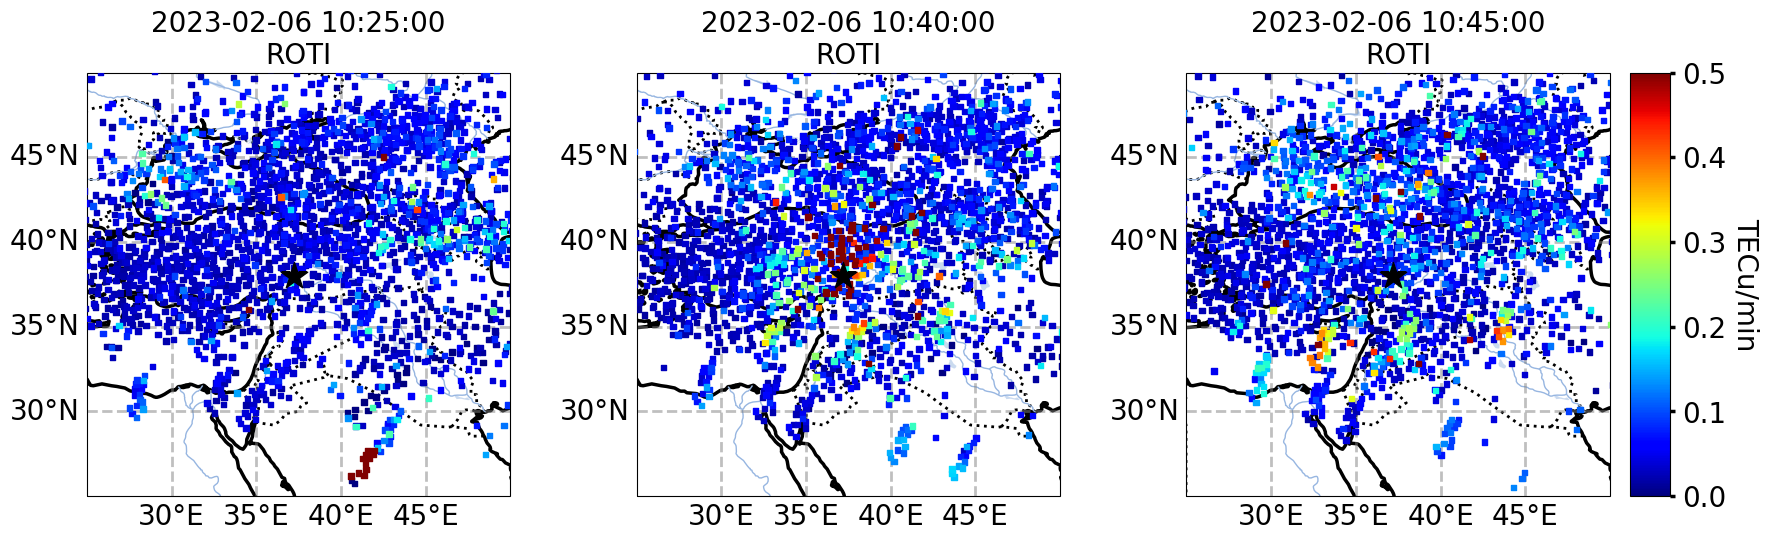

C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


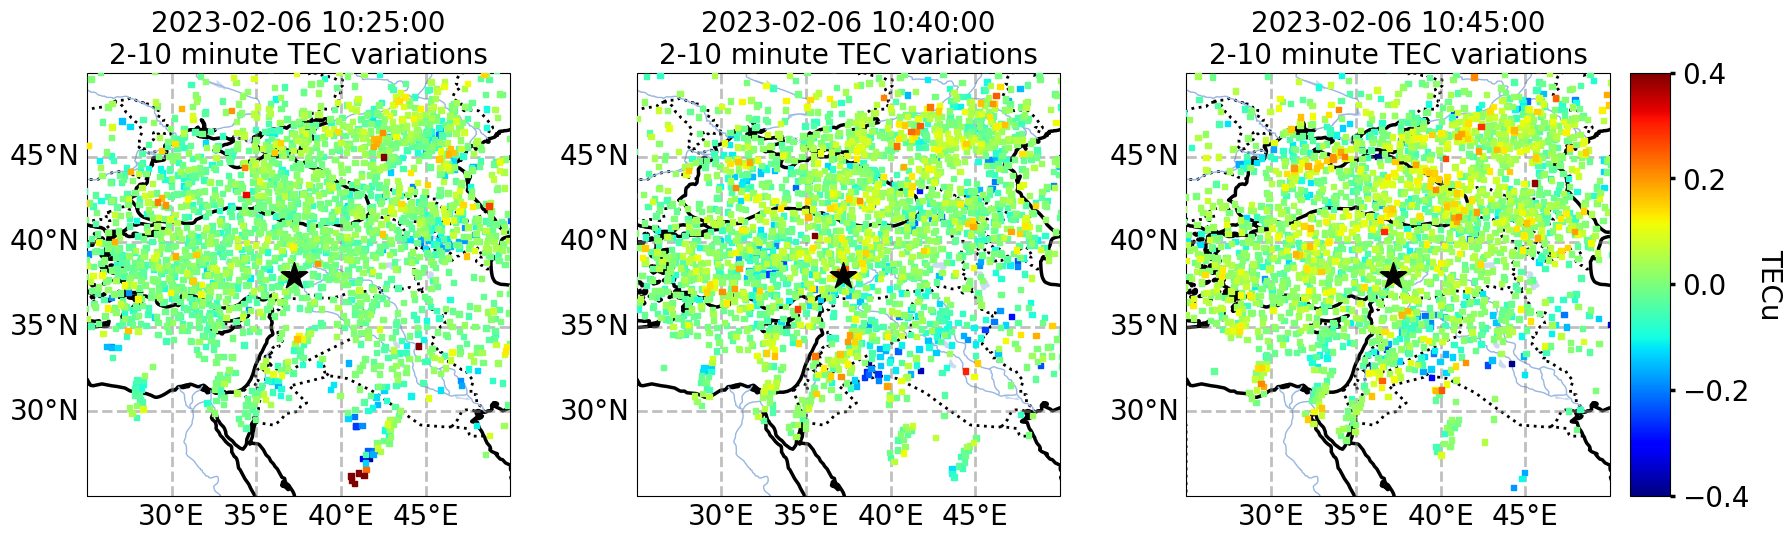

C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


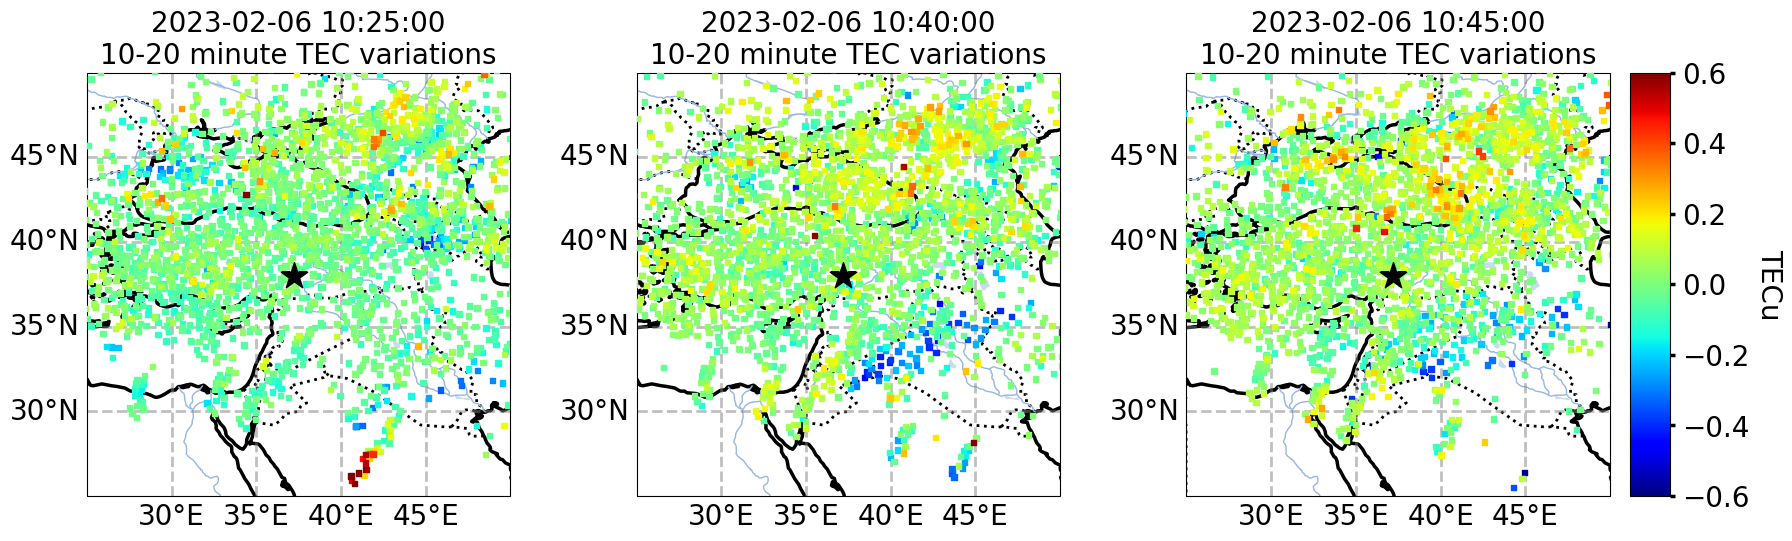

C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


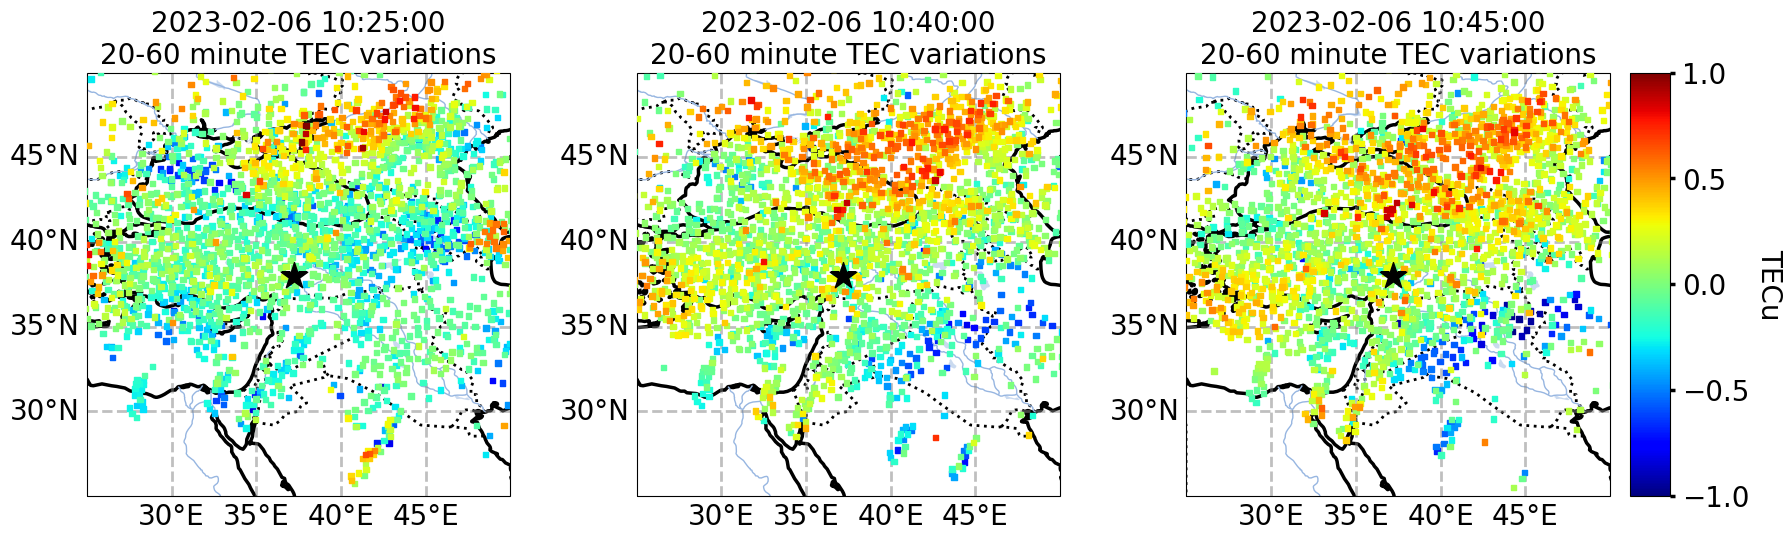

In [7]:
plot_maps([FILES_PRODUCT_10_24, TNPGN_FILES_PRODUCT_10_24], 
          FILES_PRODUCT_10_24, 
          EPICENTERS['10:24'])

C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


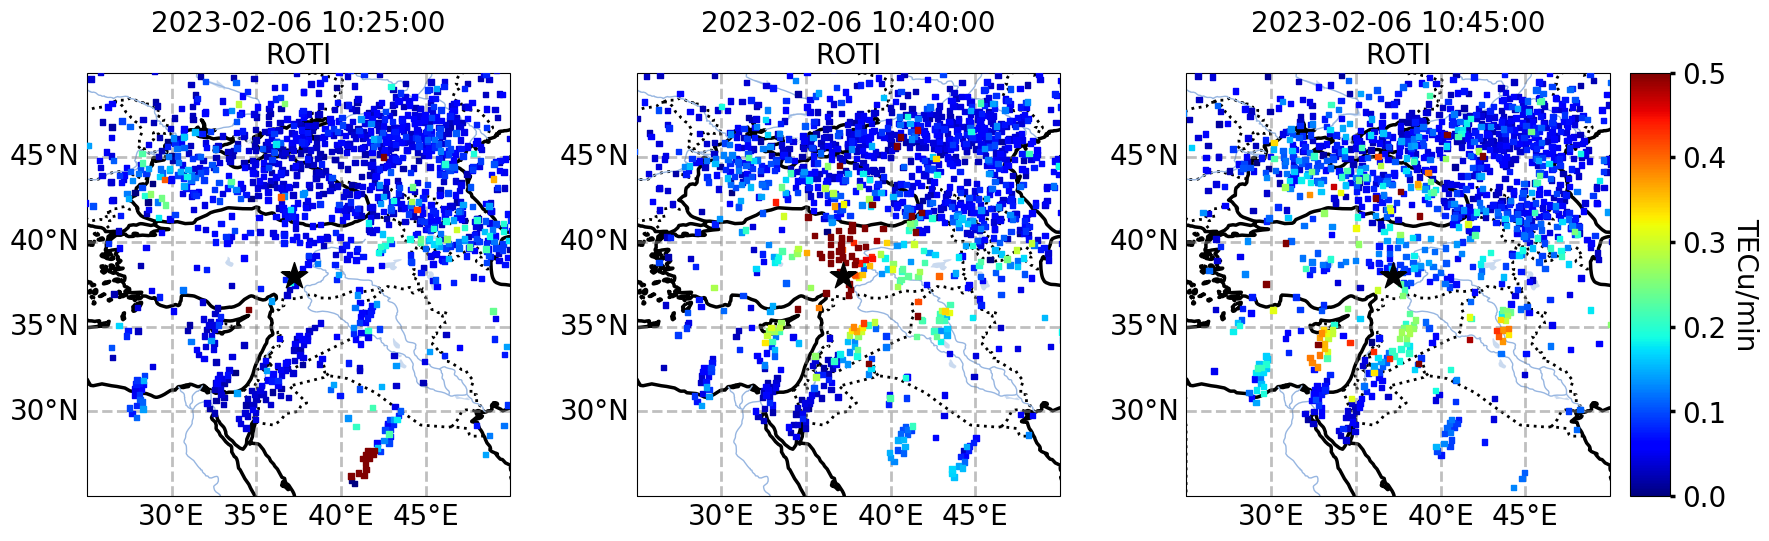

C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


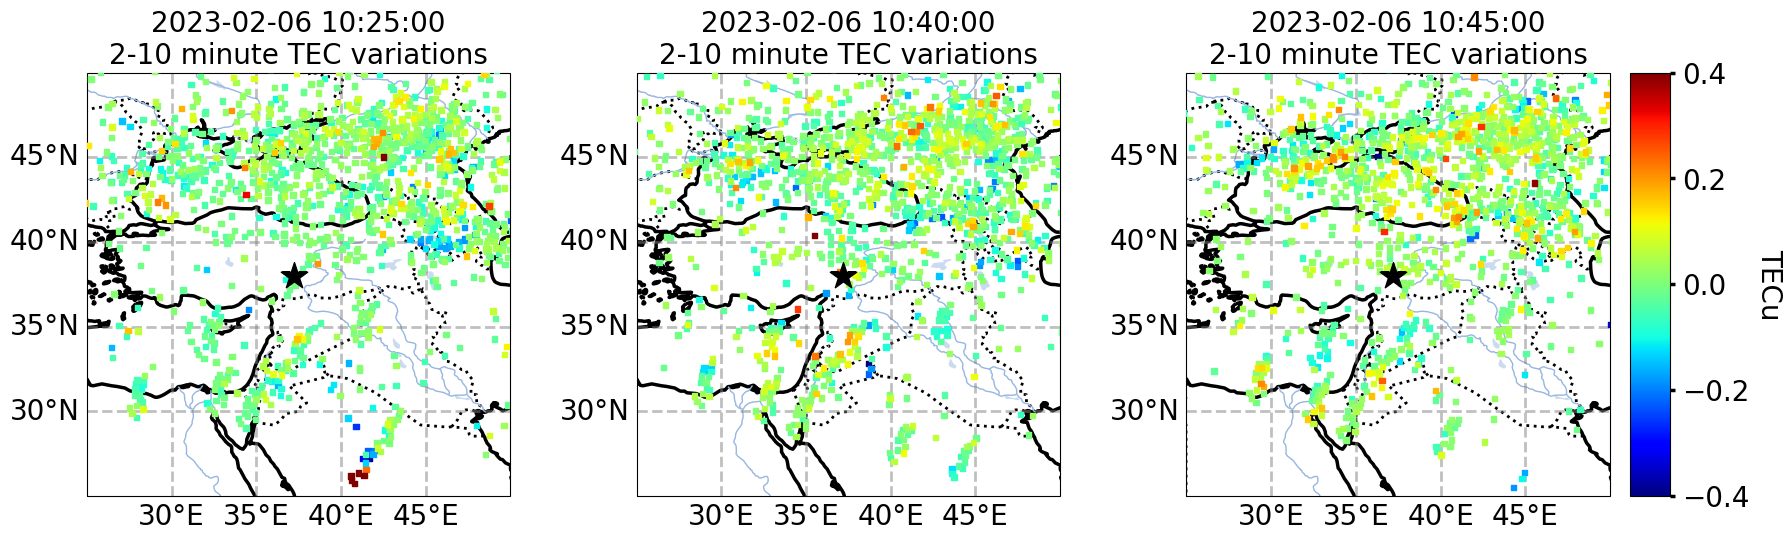

C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


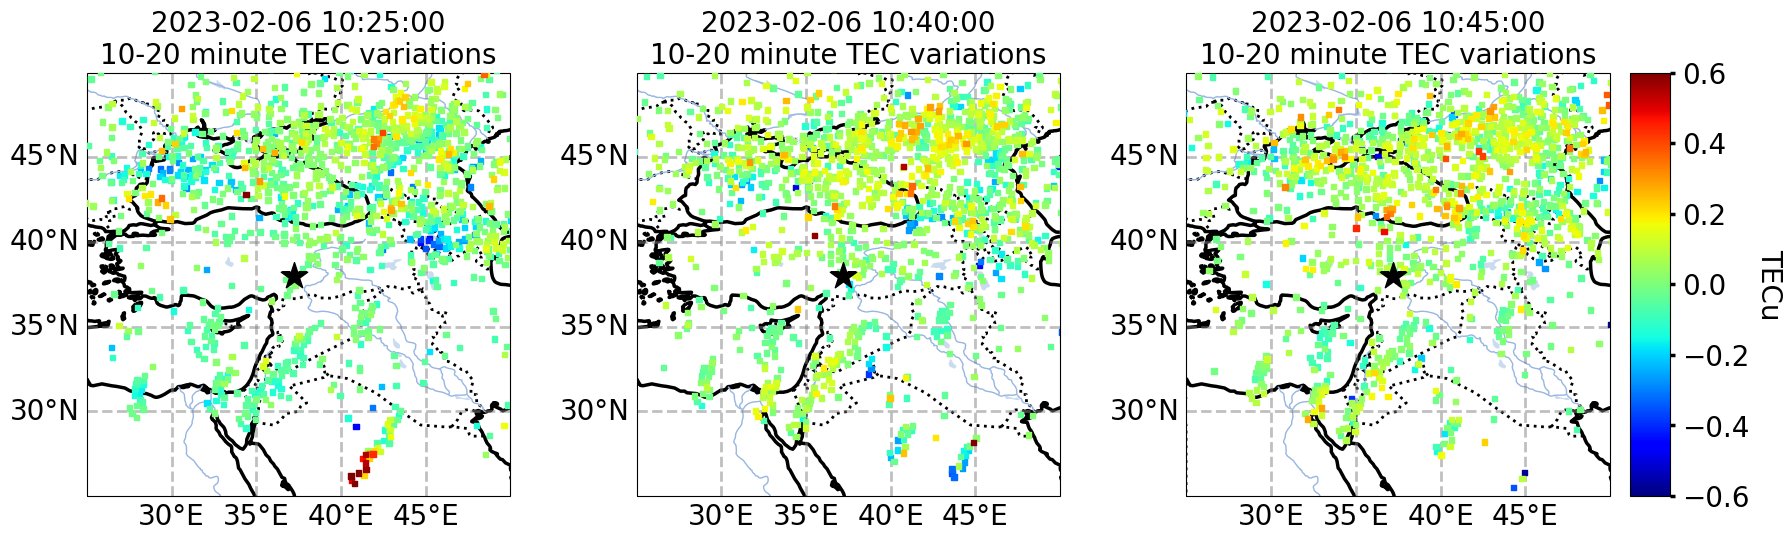

C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


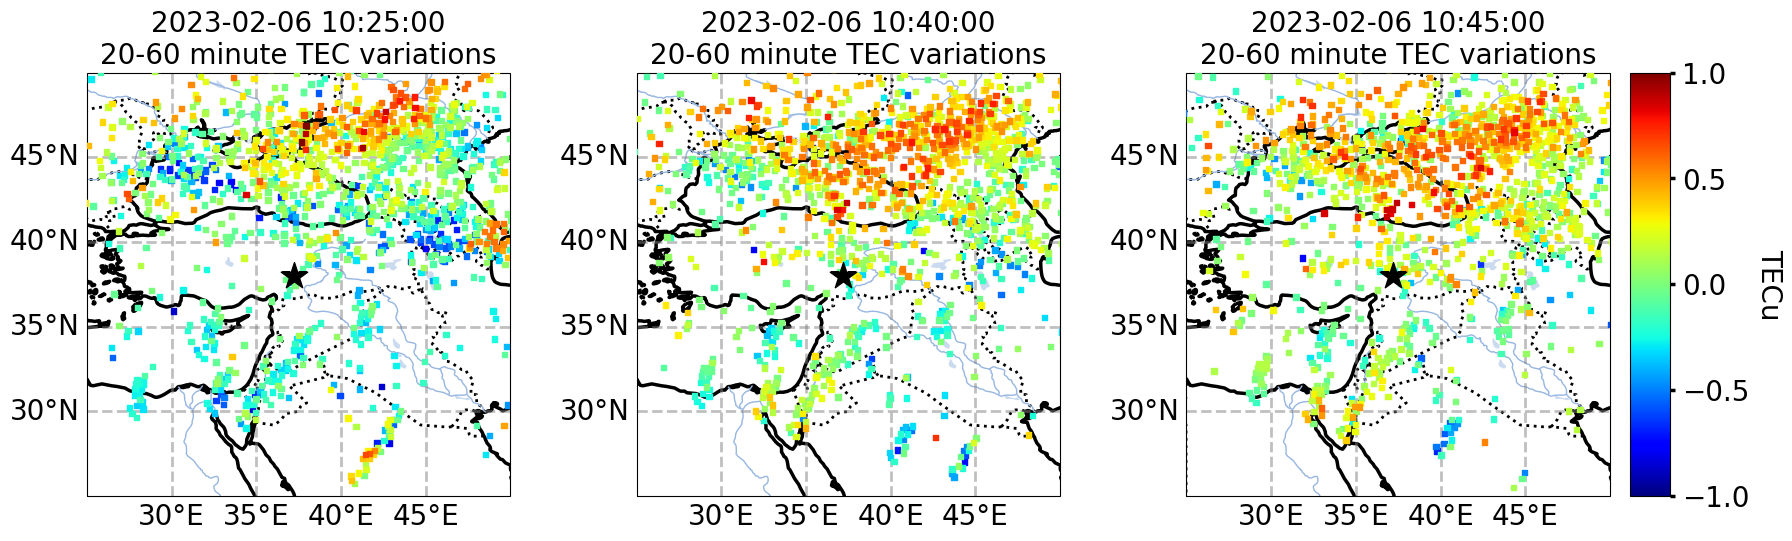

In [9]:
plot_maps([FILES_PRODUCT_10_24], 
          FILES_PRODUCT_10_24, 
          EPICENTERS['10:24'])

C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


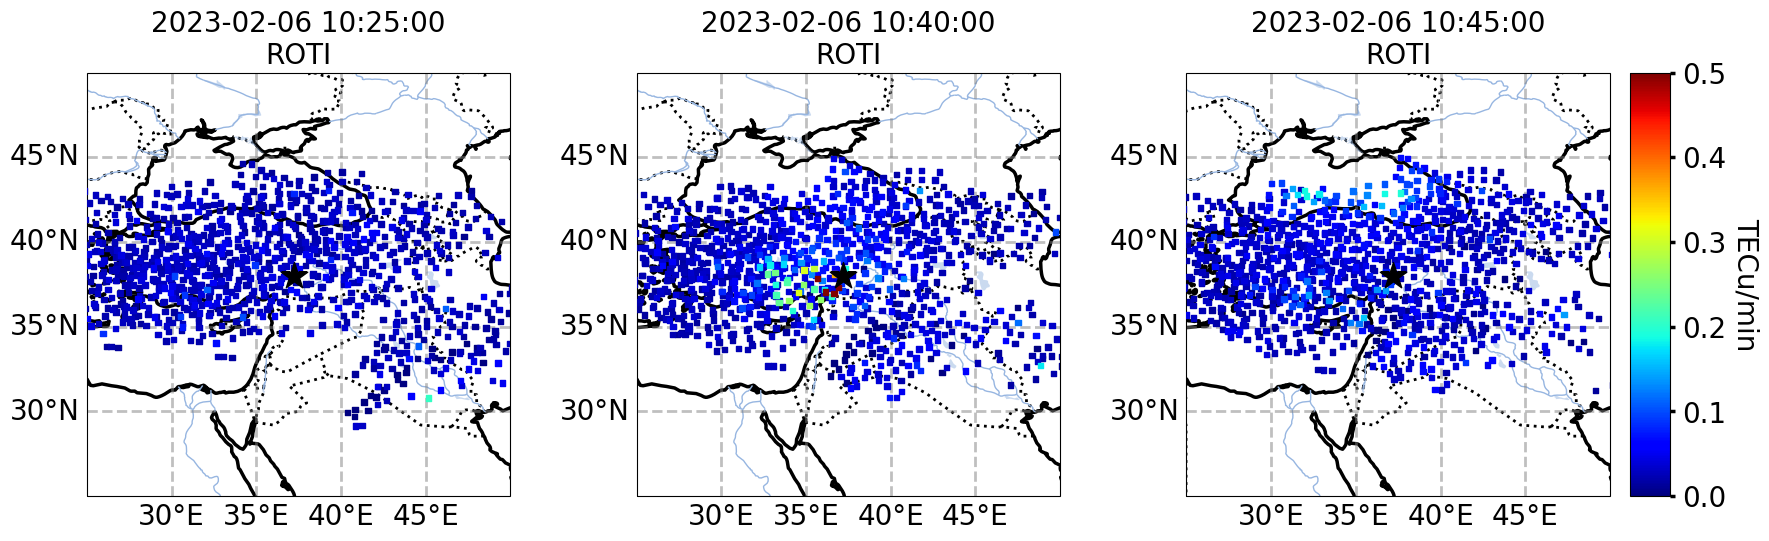

C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


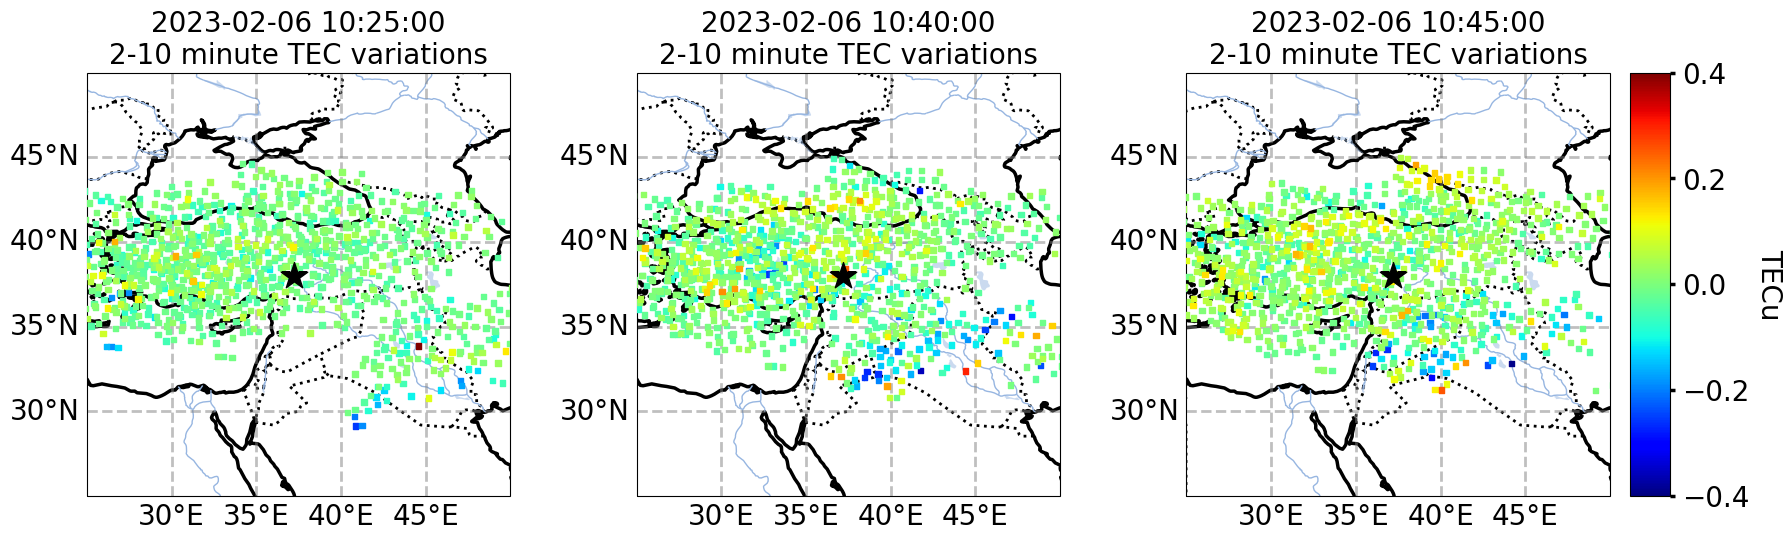

C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


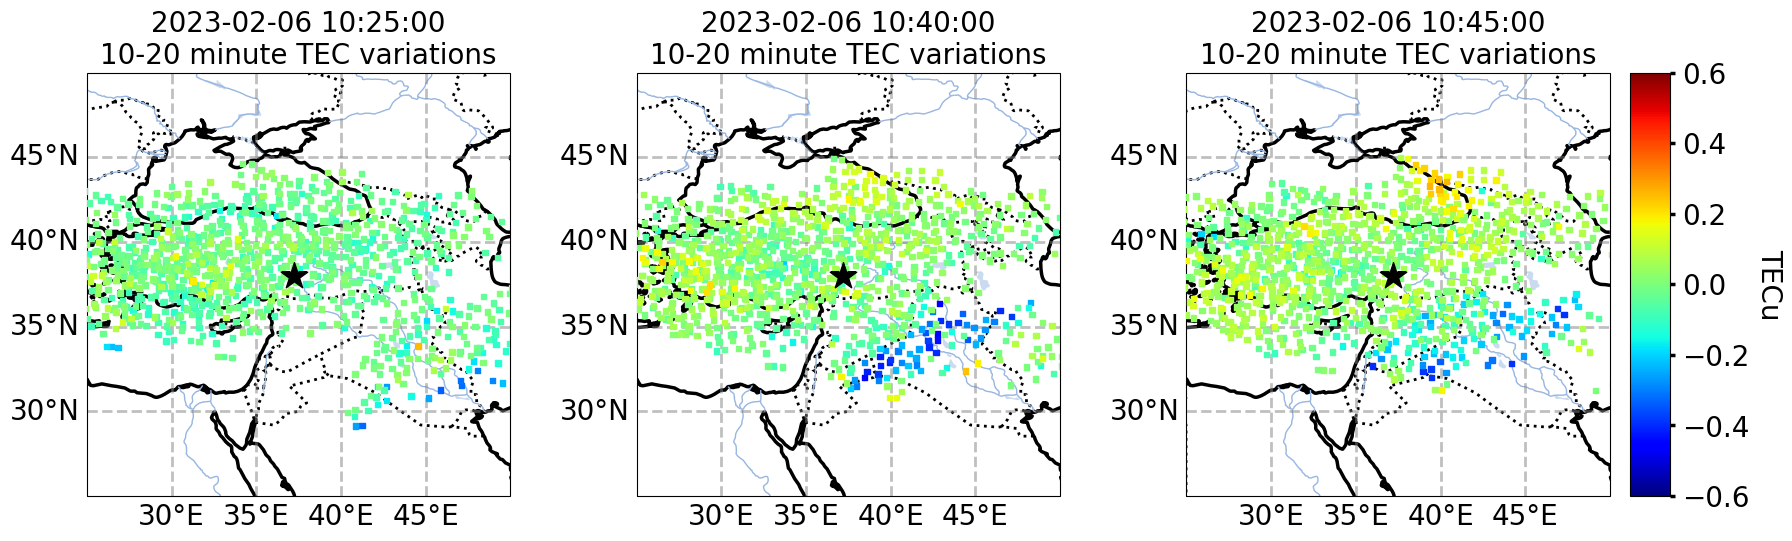

C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


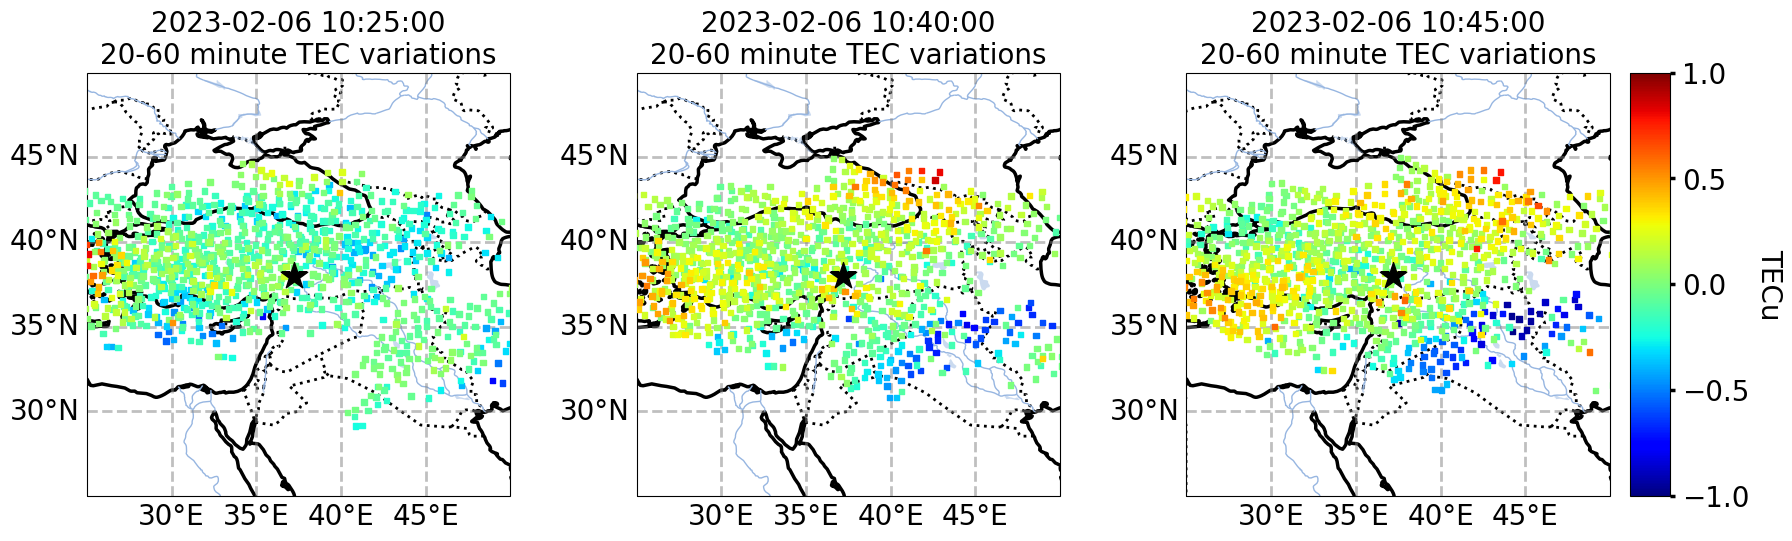

In [10]:
plot_maps([TNPGN_FILES_PRODUCT_10_24], 
           TNPGN_FILES_PRODUCT_10_24, 
           EPICENTERS['10:24'])

## Repeat plot for night quake

Note we changed limits for color scale

C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


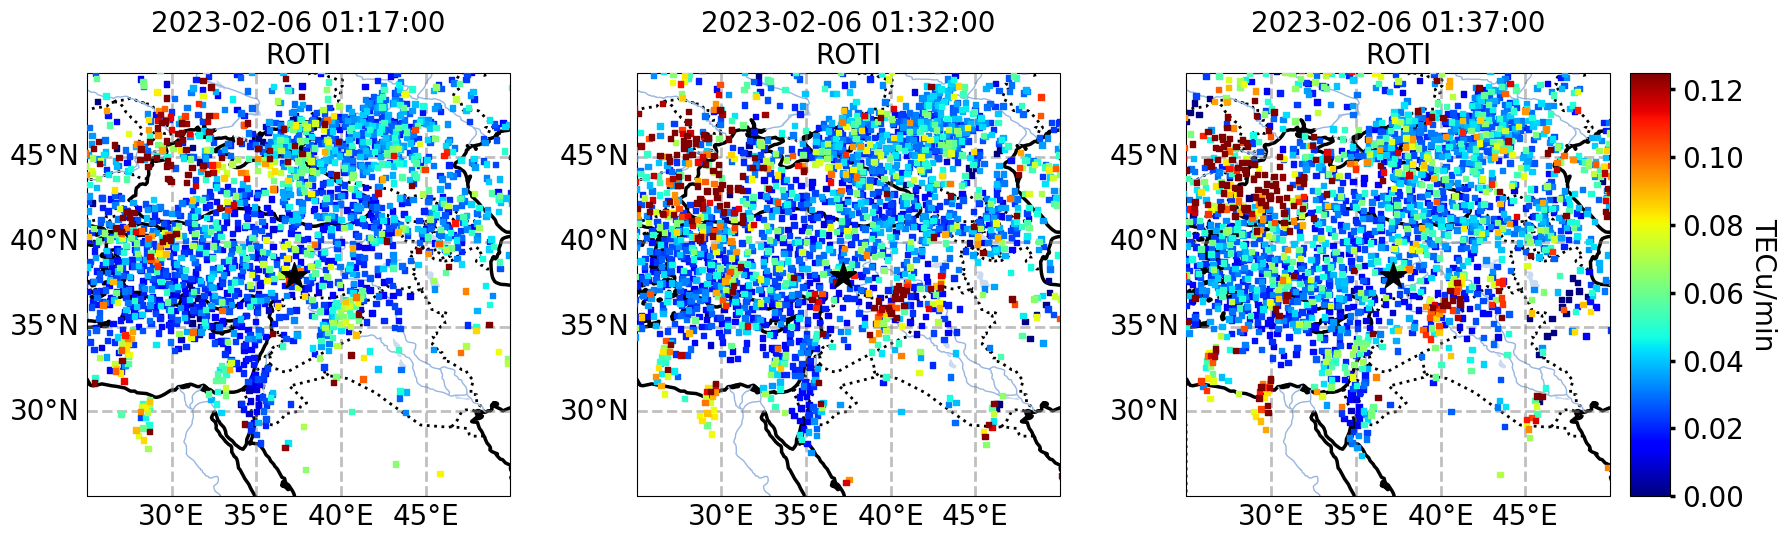

C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


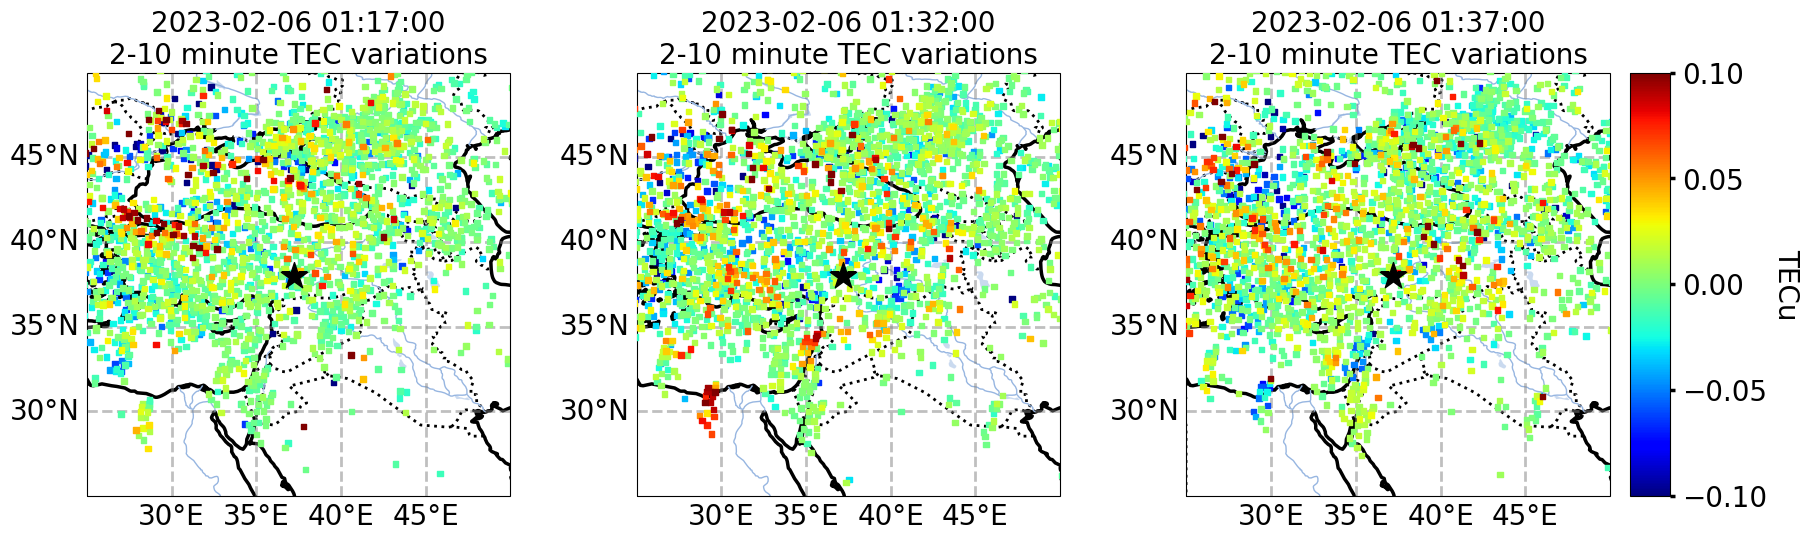

C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


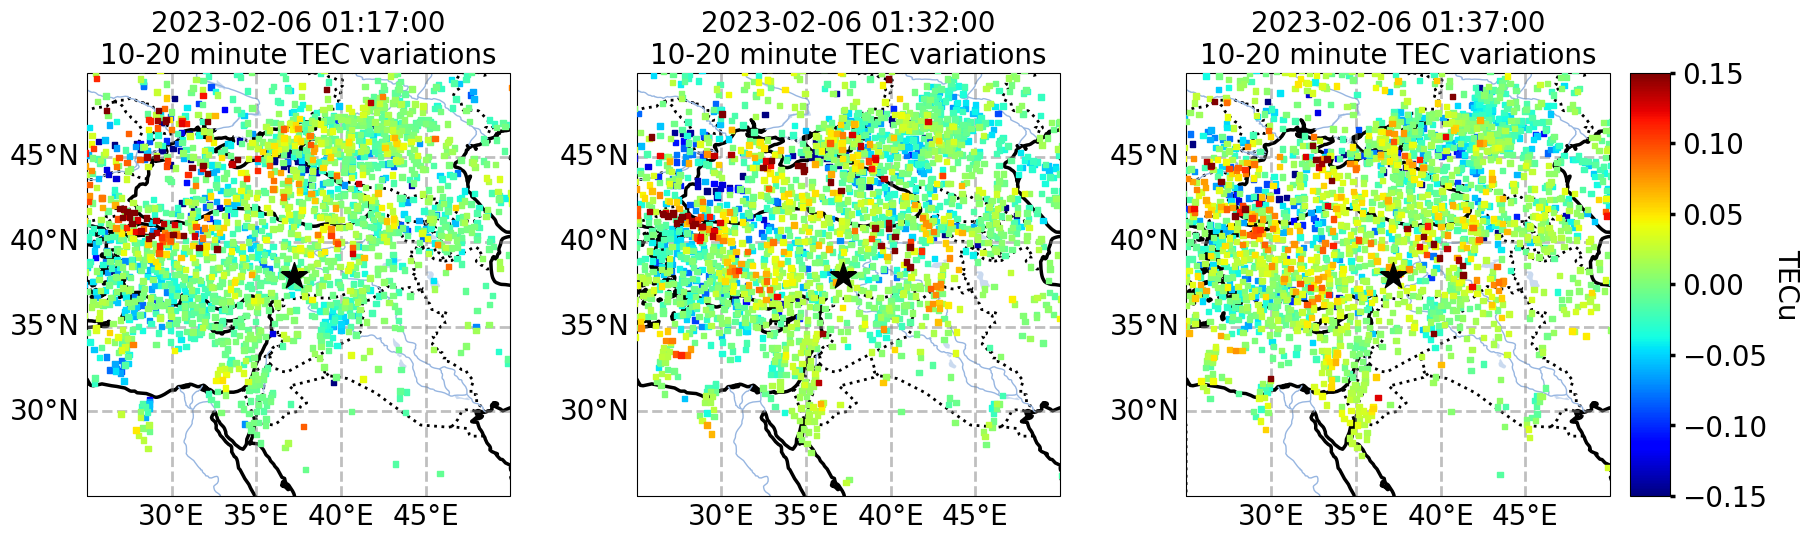

C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Vanya\miniconda3\envs\turkey_eq\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


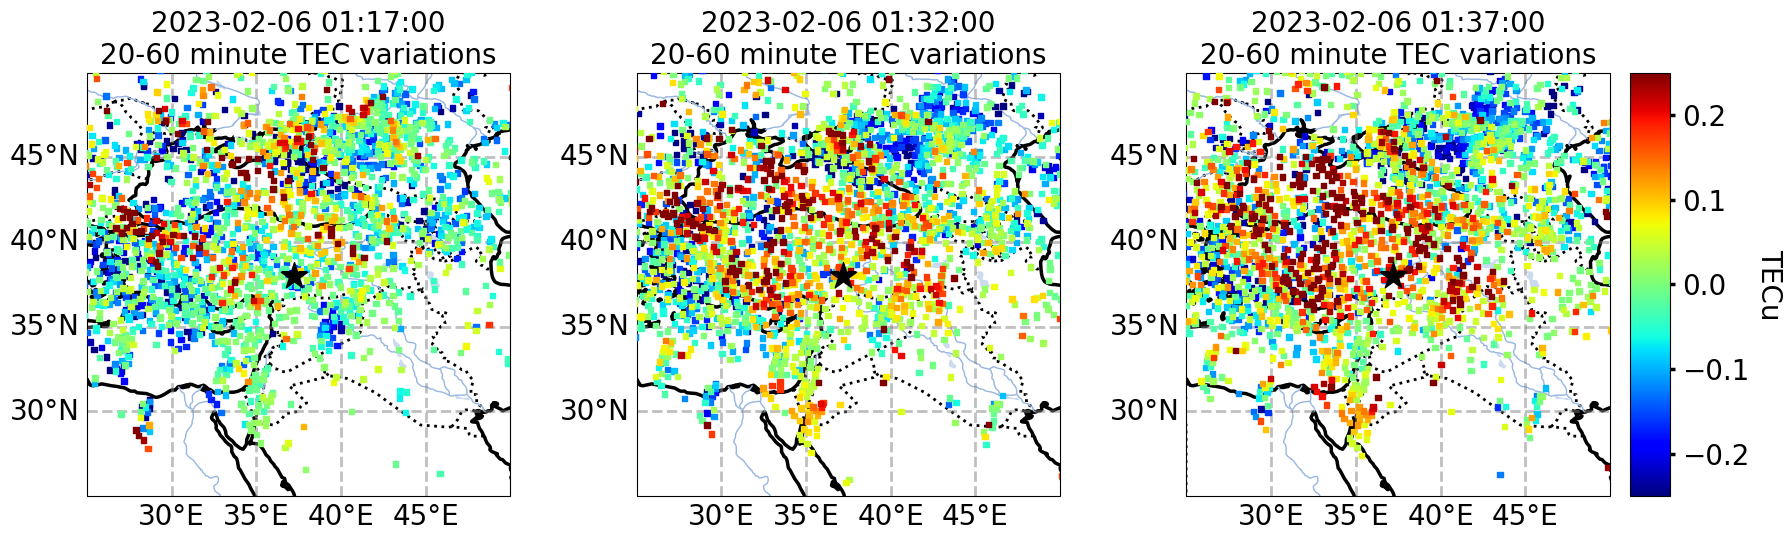

In [11]:
times = [datetime(2023, 2, 6, 1, 17),
         datetime(2023, 2, 6, 1, 32),
         datetime(2023, 2, 6, 1, 37)]
plot_maps([FILES_PRODUCT_01_17, TNPGN_FILES_PRODUCT_01_17], 
          FILES_PRODUCT_01_17, 
          EPICENTERS['01:17'], 
          times = times,
          scale=0.25)

KeyError: 'ROTI'

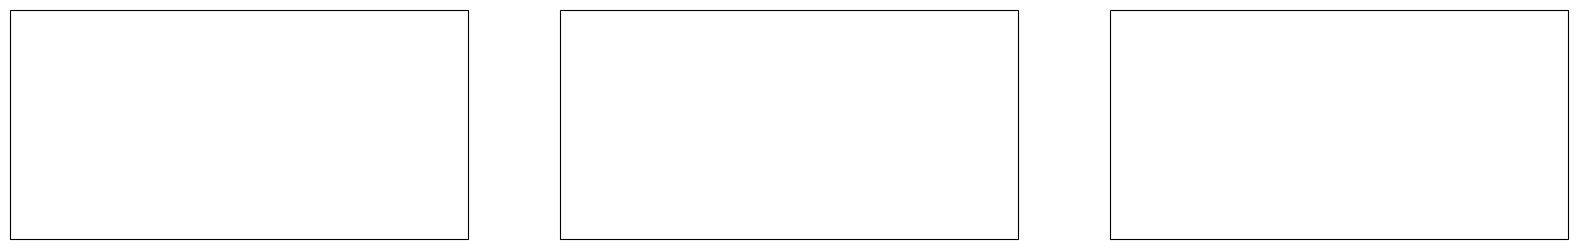

In [12]:
C_LIMITS ={
    'ROTI': [0,0.1,'TECu/min'],
    '2-10 minute TEC variations': [-0.1,0.1,'TECu'],
    '10-20 minute TEC variations': [-0.2,0.2,'TECu'],
    '20-60 minute TEC variations': [-0.6,0.6,'TECu'],
    'tec': [0,50,'TECu/min'],
    'tec_adjusted': [0,50,'TECu'],
}

times = [datetime(2023, 2, 6, 1, 17),
         datetime(2023, 2, 6, 1, 32),
         datetime(2023, 2, 6, 1, 37)]
times = [t.replace(tzinfo=t.tzinfo or _UTC) for t in times]
for f in FILES_PRODUCT_01_17:
    data = retrieve_data(f, FILES_PRODUCT_01_17[f], times)
    plot_map(times, data, FILES_PRODUCT_01_17[f],
             lat_limits=(25, 50),
             lon_limits=(25, 50),
             markers=[EPICENTERS['01:17']])

# Lets examine the series (note: data load is commented)

## Select sites and make proper structure

In [ ]:
def get_sites_coords(local_file, exclude_sites = [],
                    min_lat=-90, max_lat=90,
                    min_lon=-180, max_lon=180,):    
    f = h5py.File(local_file)
    sites = list(f.keys())
    coords = dict()
    for site in sites:
        if site in exclude_sites:
            continue
        latlon = f[site].attrs
        slat = np.degrees(latlon['lat'])
        slon = np.degrees(latlon['lon'])
        if min_lat < slat < max_lat and min_lon < slon < max_lon:
            coords[site] = dict()
            coords[site]['lat'] = f[site].attrs['lat']
            coords[site]['lon'] = f[site].attrs['lon']
    f.close()
    return coords

def select_visible_sats_data(local_file, sites, tcheck):
    f = h5py.File(local_file)
    data = dict()
    for site in sites:
        data[site] = dict()
        for sat in f[site].keys():
            times = [datetime.utcfromtimestamp(t) for t in f[site][sat]['timestamp'][:]]
            if tcheck in times:
                data[site][sat] = {'time': times,
                                   'tec':  f[site][sat]['tec'][:],
                                   'roti': f[site][sat]['roti'][:],
                                   'azimuth': f[site][sat]['azimuth'][:],
                                   'elevation': f[site][sat]['elevation'][:]}
    f.close()
    return data

def get_visible_sats_names(data):
    sats = list()
    for site in data:
        for sat in data[site]:
            sats.append(sat)
    return list(set(sats))


def select_sats_by_params(data, sats, tcheck, min_sats_number=5, **kwargs):
    min_elevation = np.radians(kwargs.get('min_elevation', 10))
    min_azimuth = np.radians(kwargs.get('min_elevation', 0))
    max_azimuth = np.radians(kwargs.get('min_elevation', 360))
    sats_count = {sat: 0 for sat in set(sats)}
    for site in data:
        for sat in data[site]:
            if sat not in sats:
                continue
            azs = data[site][sat]['azimuth']
            els = data[site][sat]['elevation']
            times = data[site][sat]['time']
            if tcheck in times:
                ind = times.index(tcheck)
                if not(min_azimuth < azs[ind] < max_azimuth):
                    continue
                if not(els[ind] > min_elevation):
                    continue
                sats_count[sat] = sats_count[sat] + 1
    sats_count = {sat: c for sat, c in sats_count.items() if c > min_sats_number}
    return sats_count

def select_reoder_data(data, sats_count):
    _data = {sat: list() for sat in sats_count}
    for site in data:
        for sat in sats_count:
            if not sat in data[site]:
                continue
            _data[sat].append(data[site][sat])
            _data[sat][-1]['site'] = site
    return _data
            

## Plot function for series

In [ ]:
def plot_single_sat(data_plot, sat, epc, plot_product, 
                    limits=(3600,3600),
                    shift=0.5,
                    site_labels=False):
    i = 0
    plt.figure(figsize=(6, 13))
    plt.rcParams.update(DEFAULT_PARAMS)
    plot_ax = plt.axes()
    
    sites = list()
    locs = list()
    for d in data_plot[sat]:
        _t = d['time']
        _val = d[plot_product]
        #for i in range(len(_t)-1):
            #if d['times'][i] - d['times'][i+1] > timedelta(0, 30):
            #    _t[i] = None
        plt.plot(_t, _val+i*shift, marker='.')
        locs.append(i*shift)
        i = i + 1
        plt.axvline(x=epc['time'], color='black', linewidth=3)
        sites.append(d['site'])
    print('Sorted', sites)
    plt.xlim(epc['time'] -timedelta(0, limits[0]),
             epc['time'] +timedelta(0, limits[1]),)
    # to make grid lines on top and bottom
    locs = [-2*shift, -shift] + locs + [i * shift, (i+1) * shift]
    sites = ['']*2 + sites + ['']*2
    if site_labels:
        plt.yticks(locs, sites)
    plt.ylim(-2 * shift, (i+1)*shift )
    plot_ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    plt.title('Satellite '+sat)
    plt.grid()
    plt.xlabel('UTC for February 6, 2023')
    plt.show()

## Calculate rate of tec

In [ ]:
def get_dtecs(data,
              sort_type='none', threshold = 0.5,
              start_time = datetime(2023, 2, 6, 10,25),
              end_time = datetime(2023, 2, 6, 10,46),
              sat = 'E08', 
              threshold_type="all"):

    dtecs = dict()
    dtecs[sat] = list()
    for _data in data[sat]:
        if not (start_time in _data['time'] and
                end_time in _data['time']):
            continue
        start = _data['time'].index(start_time)
        end = _data['time'].index(end_time)
        tec = _data['tec'][start: end]
        dtec = tec - _data['tec'][start-1: end-1]
        dtec = dtec - np.average(dtec)
        take = False
        threshold_index = None
        for itec, d in enumerate(dtec[1:]):
            take = ((threshold_type == 'all' and abs(d) >= threshold) or
                    (threshold_type == 'max' and d >= threshold) or
                    (threshold_type == 'min' and d <= -threshold))
            if take:
                threshold_index = itec+1
                break
        if take:
            tec = [0, ]
            for dt in dtec[1:]:
                tec.append(dt + tec[-1])
            tec = np.array(tec)
            dtecs[sat].append({'time': _data['time'][start: end],
                              'dtec': dtec,
                              'tec': tec,
                              'roti': _data['roti'][start: end],
                              'site': _data['site'][:],
                              'th_elevation':  _data['elevation'][start: end][threshold_index],
                              'th_azimuth':  _data['azimuth'][start: end][threshold_index],
                              'th_time':  _data['time'][start: end][threshold_index],
                              'th_index': threshold_index})

    if sort_type in ['max', 'min']:
        max_times = []
        for i, dtec in enumerate(dtecs[sat]):
            vals = dtec['dtec']
            for j in range(1, len(vals) - 1):
                t = dtec['time'][j]
                d = dtec['dtec'][j]
                cond = False
                if sort_type=='max':
                    cond = (d >= threshold /2 and d > vals[j-1] and d > vals[j+1])
                if sort_type=='min':
                    cond = (d <= -threshold /2 and d < vals[j-1] and d < vals[j+1])
                if cond:
                    max_times.append((i, t))
                    dtec['max_time'] = t
                    #print(d, t)
                    break
            else:
                dtec['max_time'] = start_time

        dtecs[sat].sort(key = lambda x: x['max_time'])
    return dtecs

In [ ]:
local_file = 'tnpgn_2023-02-06.h5'
tcheck = datetime(2023, 2, 6, 10, 38)
#url = 'https://simurg.iszf.irk.ru/gen_file?data=obs&date=2023-02-06'
#response = requests.get(url)
#open(local_file, "wb").write(response.content)
coords = get_sites_coords(local_file, exclude_sites=['guru'])
sites = [site for site in coords]
data = select_visible_sats_data(local_file, sites, tcheck = tcheck)
visible_sats = get_visible_sats_names(data)
sats_count = select_sats_by_params(data, visible_sats, tcheck)
_data = select_reoder_data(data, sats_count)


## Find satellite with max effects by means of ROTI

In [ ]:
local_file = 'region_2023-02-06.h5'
tcheck = datetime(2023, 2, 6, 10, 38)
#url = 'https://simurg.iszf.irk.ru/gen_file?data=obs&date=2023-02-06'
#response = requests.get(url)
#open(local_file, "wb").write(response.content)
coords = get_sites_coords(local_file, exclude_sites=['guru'])
sites = [site for site in coords]
data = select_visible_sats_data(local_file, sites, tcheck = tcheck)
visible_sats = get_visible_sats_names(data)
sats_count = select_sats_by_params(data, visible_sats, tcheck)
_data = select_reoder_data(data, sats_count)
sat = 'E08'
print(len(_data))
dtecs = get_dtecs(_data, sort_type='max', sat=sat, threshold=0.5)
sites = []
for d in dtecs[sat]:
    sites.append(d['site'])
print(sites)
plot_single_sat(dtecs, sat, EPICENTERS['10:24'], 'dtec',
                limits=(0,1200),
                shift=0.5, site_labels=True)
plot_single_sat(dtecs, sat, EPICENTERS['10:24'], 'tec',
                limits=(0,1200),
                shift=0.5, site_labels=True)
plot_single_sat(dtecs, sat, EPICENTERS['10:24'], 'roti',
                limits=(0,1200),
                shift=0.5, site_labels=True)

# Individual line-of-sight velocity estimate

In [ ]:
from numpy import pi, sin, cos, arccos, arcsin
from scipy.stats import norm

RE_meters = 6371000

def sub_ionospheric(s_lat, s_lon, hm, az, el, R=RE_meters):
    """
    Calculates subionospheric point and delatas from site
    Parameters:
        s_lat, slon - site latitude and longitude in radians
        hm - ionposheric maximum height (meters)
        az, el - azimuth and elevation of the site-sattelite line of sight in
            radians
        R - Earth radius (meters)
    """
    #TODO use meters
    psi = pi / 2 - el - arcsin(cos(el) * R / (R + hm))
    lat = bi = arcsin(sin(s_lat) * cos(psi) + cos(s_lat) * sin(psi) * cos(az))
    lon = sli = s_lon + arcsin(sin(psi) * sin(az) / cos(bi))

    lon = lon - 2 * pi if lon > pi else lon
    lon = lon + 2 * pi if lon < -pi else lon
    return lat, lon


def great_circle_distance_numpy(late, lone, latp, lonp, R=RE_meters):
    """
    Calculates arc length. Uses numpy arrays
    late, latp: double
        latitude in radians
    lone, lonp: double
        longitudes in radians
    R: double
        radius
    """
    lone[np.where(lone < 0)] = lone[np.where(lone < 0)] + 2*pi
    lonp[np.where(lonp < 0)] = lonp[np.where(lonp < 0)] + 2*pi
    dlon = lonp - lone
    inds = np.where((dlon > 0) & (dlon > pi)) 
    dlon[inds] = 2 * pi - dlon[inds]
    dlon[np.where((dlon < 0) & (dlon < -pi))] += 2 * pi
    dlon[np.where((dlon < 0) & (dlon < -pi))] = -dlon[np.where((dlon < 0) & (dlon < -pi))]
    cosgamma = sin(late) * sin(latp) + cos(late) * cos(latp) * cos(dlon)
    return R * arccos(cosgamma)

def calculate_distances_from_epicenter(data, coords, sat, elat, elon):
    for _data in data[sat]:
        sites_coords = coords[_data['site']]
        el = _data['th_elevation']
        az = _data['th_azimuth']
        slat = sites_coords['lat']
        slon = sites_coords['lon']
        sip_lat, sip_lon = sub_ionospheric(slat, slon, hm=300000, az=az, el=el)
        d = great_circle_distance_numpy(np.array([sip_lat]), np.array([sip_lon]), 
                                        np.array([elat]), np.array([elat]),
                                        R = RE_meters + 300000)
        _data['distance'] = d[0]

        
def fit_and_plot_distribution(data, xmin=0, xmax=4000):
    print(len(data))
    plt.figure(figsize=(18, 9))
    mu, std = norm.fit(data)
    plt.grid()
    # Plot the histogram.
    counts, edges, bars = plt.hist(data, bins=20, density=True, alpha=0.6, color='g')
    #plt.bar_label(bars)
    y = ((1 / (np.sqrt(2 * np.pi) * std)) *
         np.exp(-0.5 * (1 / std * (edges - mu))**2))
    # Plot the PDF.
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std) # * len(data) * len(data)
    plt.plot(x, p, 'k', linewidth=3, color='black')
    title = "Fit results: mean = %.2f m/s,  STD = %.2f m/s"  % (mu, std)
    plt.xlabel('velocity, m/s')

    ytick = [i / 10000 * 1.03213 for i in range(0, 13, 2)]
    ylables = [round(i) for i in range(0, 13, 2)] 
    plt.yticks(ytick, ylables)
    plt.ylabel('Occuranes')
    plt.title(title)
    plt.ylim(0, 13 / 10000 * 1.03213)
    
    plt.show()

In [ ]:
local_file = 'region_2023-02-06.h5'
tcheck = datetime(2023, 2, 6, 10, 38)
#url = 'https://simurg.iszf.irk.ru/gen_file?data=obs&date=2023-02-06'
#response = requests.get(url)
#open(local_file, "wb").write(response.content)
coords = get_sites_coords(local_file, exclude_sites=['guru'])
sites = [site for site in coords]
data = select_visible_sats_data(local_file, sites, tcheck = tcheck)
visible_sats = get_visible_sats_names(data)
sats_count = select_sats_by_params(data, visible_sats, tcheck)
_data = select_reoder_data(data, sats_count)


In [ ]:
sat='G17'
dtecs = get_dtecs(_data, sort_type='max', sat=sat, threshold=0.25, threshold_type='min')
sites = []
for d in dtecs[sat]:
    sites.append(d['site'])
print(sites)
plot_single_sat(dtecs, sat, EPICENTERS['10:24'], 'dtec',
                limits=(0,1200),
                shift=0.5, site_labels=True)

In [ ]:
local_file = 'region_2023-02-06.h5'
tcheck = datetime(2023, 2, 6, 10, 38)
#url = 'https://simurg.iszf.irk.ru/gen_file?data=obs&date=2023-02-06'
#response = requests.get(url)
#open(local_file, "wb").write(response.content)
coords = get_sites_coords(local_file, exclude_sites=['guru'])
sites = [site for site in coords]
data = select_visible_sats_data(local_file, sites, tcheck = tcheck)
visible_sats = get_visible_sats_names(data)
sats_count = select_sats_by_params(data, visible_sats, tcheck)
_data = select_reoder_data(data, sats_count)


sats = ['G17', 'G14', 'G24', 'E08']

for start_time in [datetime(2023, 2, 6, 10, 35, 0) + timedelta(0, 30 * i) for i in range(1)]:
    deltas = list()
    dists = list()
    velocities = list()

    for sat in sats:
        dtecs = get_dtecs(_data, sort_type='max', sat=sat, threshold=0.25, threshold_type='min')
        elat = np.radians(EPICENTERS['10:24']['lat'])
        elon = np.radians(EPICENTERS['10:24']['lon'])
        calculate_distances_from_epicenter(dtecs, coords, sat, elat, elon)
        #plot_single_sat(dtecs, sat, EPICENTERS['10:24'], 'dtec',
        #                limits=(0,1200),
        #                shift=0.5, site_labels=True)
        for data in dtecs[sat]:
            delta  = (data['th_time'] - start_time )/ timedelta(0, 1)
            if delta == 0.0:
                continue
            velocity = data['distance'] / delta
            if velocity < 0 or velocity > 4000:
                continue
            deltas.append(delta)
            dists.append(data['distance'])
            velocities.append(velocity)
    print(start_time)
    fit_and_plot_distribution(velocities)
    
    

# Major effects

In [ ]:
C_LIMITS ={
    'ROTI': [0,0.5,'TECu/min'],
    '2-10 minute TEC variations': [-0.4,0.4,'TECu'],
    '10-20 minute TEC variations': [-0.2,0.2,'TECu'],
    '20-60 minute TEC variations': [-0.6,0.6,'TECu'],
    'tec': [0,50,'TECu/min'],
    'tec_adjusted': [0,50,'TECu'],
}

times = [datetime(2023, 2, 6, 10, 33, 0) + timedelta(0, 30) * i for i in range(18)]
#_FILES = dict()
#_FILES["roti_10_24.h5"] = FILES_PRODUCT_10_24["roti_10_24.h5"]
#_FILES["dtec_2_10_10_24.h5"] = FILES_PRODUCT_10_24["dtec_2_10_10_24.h5"]
times = [t.replace(tzinfo=t.tzinfo or _UTC) for t in times]
prod_files = [FILES_PRODUCT_10_24, TNPGN_FILES_PRODUCT_10_24]
#for f in _FILES:
for files in zip(*prod_files):
    for t in times:
        #data = retrieve_data(f, _FILES[f], [t])
        prod = FILES_PRODUCT_10_24[files[0]]
        data = retrieve_data_multiple_source(files, prod, [t])
        data = {prod: data}
        plot_map([t], data, prod,
                 lat_limits=(25, 50),
                 lon_limits=(25, 50),
                 markers=[EPICENTERS['10:24']],
                 sort=True,
                 ncols=1,
                 clims=C_LIMITS)
        break # ROMOVE TO GET ALL FIGUREs

## Save plots to files

In [ ]:
C_LIMITS ={
    'ROTI': [0,0.5,'TECu/min'],
    '2-10 minute TEC variations': [-0.4,0.4,'TECu'],
    '10-20 minute TEC variations': [-0.2,0.2,'TECu'],
    '20-60 minute TEC variations': [-0.6,0.6,'TECu'],
    'tec': [0,50,'TECu/min'],
    'tec_adjusted': [0,50,'TECu'],
}

times = [datetime(2023, 2, 6, 10, 20, 0) + timedelta(0, 30) * i for i in range(80)]
#_FILES = dict()
#_FILES["roti_10_24.h5"] = FILES_PRODUCT_10_24["roti_10_24.h5"]
#_FILES["dtec_2_10_10_24.h5"] = FILES_PRODUCT_10_24["dtec_2_10_10_24.h5"]
times = [t.replace(tzinfo=t.tzinfo or _UTC) for t in times]
prod_files = [FILES_PRODUCT_10_24, TNPGN_FILES_PRODUCT_10_24]
#for f in _FILES:
for t in times:
    _data = dict()
    prods = list()
    for files in zip(*prod_files):
        #data = retrieve_data(f, _FILES[f], [t])
        prod = FILES_PRODUCT_10_24[files[0]]
        prods.append(prod)
        data = retrieve_data_multiple_source(files, prod, [t])
        _data[FILES_PRODUCT_10_24[files[0]]] = data
    plot_map([t], _data, prods,
             lat_limits=(25, 50),
             lon_limits=(25, 50),
             markers=[EPICENTERS['10:24']],
             sort=True,
             ncols=1,
             nrows=4,
             savefig=f"{t}",
             clims=C_LIMITS)

In [ ]:
C_LIMITS ={
    'ROTI': [0,0.2,'TECu/min'],
    '2-10 minute TEC variations': [-0.1,0.1,'TECu'],
    '10-20 minute TEC variations': [-0.2,0.2,'TECu'],
    '20-60 minute TEC variations': [-0.6,0.6,'TECu'],
    'tec': [0,50,'TECu/min'],
    'tec_adjusted': [0,50,'TECu'],
}

times = [datetime(2023, 2, 6, 1, 10, 0) + timedelta(0, 30) * i for i in range(80)]
#_FILES = dict()
#_FILES["roti_01_17.h5"] = FILES_PRODUCT_01_17["roti_01_17.h5"]
#_FILES["dtec_2_10_01_17.h5"] = FILES_PRODUCT_01_17["dtec_2_10_01_17.h5"]
prod_files = [FILES_PRODUCT_01_17, TNPGN_FILES_PRODUCT_01_17]
times = [t.replace(tzinfo=t.tzinfo or _UTC) for t in times]
#for f in _FILES:
#for f in _FILES:
for t in times:
    _data = dict()
    prods = list()
    for files in zip(*prod_files):
        #data = retrieve_data(f, _FILES[f], [t])
        prod = FILES_PRODUCT_01_17[files[0]]
        prods.append(prod)
        data = retrieve_data_multiple_source(files, prod, [t])
        _data[FILES_PRODUCT_01_17[files[0]]] = data
    plot_map([t], _data, prods,
             lat_limits=(25, 50),
             lon_limits=(25, 50),
             markers=[EPICENTERS['01:17']],
             sort=True,
             ncols=1,
             nrows=4,
             savefig=f"{t}",
             clims=C_LIMITS)

# Distance time

In [ ]:


def get_dist_time(data, eq_location, direction='all'):
    x, y, c = [], [], []
    for time, map_data in data.items():
        lats = np.radians(map_data["lat"][:])
        lons = np.radians(map_data["lon"][:])
        vals = map_data["vals"][:]
        _eq_location = {}
        _eq_location["lat"] = np.radians(eq_location["lat"])
        _eq_location["lon"] = np.radians(eq_location["lon"])
        if direction == "all":
            inds = np.isreal(lats)
        elif direction == "north":
            inds = lats >= _eq_location["lat"]
        elif direction == "south":
            inds = lats <= _eq_location["lat"]
        elif direction == "east":
            inds = lats >= _eq_location["lon"]
        elif direction == "west":
            inds = lats <= _eq_location["lon"]
        else:
            inds = numpy.isreal(lats)
        lats = lats[inds]
        lons = lons[inds]
        vals = vals[inds]
        plats = np.zeros_like(lats)
        plons = np.zeros_like(lons)
        plats[:] = _eq_location["lat"]
        plons[:] = _eq_location["lon"]

        dists = great_circle_distance_numpy(lats,lons, 
                                            plats, plons)
        

        x.extend([time] * len(vals))
        y.extend(dists / 1000)
        c.extend(vals)
    return x, y, c

def plot_distance_time(x, y, c, ptype, sort = True, line=dict(), clims=C_LIMITS, dmax=1750):
    c_abs = [abs(_c) for _c in c]
    if sort:    
        x = [i for _, i in sorted(zip(c_abs, x))]
        y = [i for _, i in sorted(zip(c_abs, y))]
        c = [i for _, i in sorted(zip(c_abs, c))]
        #x = [i for _, i in sorted(zip(c, x))]
        #y = [i for _, i in sorted(zip(c, y))]
        #c.sort()

    times = [t for t in data]
    times.sort()
    plt.figure(figsize=(18, 5))
    plt.rcParams.update(DEFAULT_PARAMS)
    plot_ax = plt.axes()
    #c[c<0.1] = np.nan
    plt.scatter(x, y, c=c, cmap='jet')
    cbar = plt.colorbar()
    plt.clim(clims[ptype][0], clims[ptype][1])
    plt.ylabel('Distance, km')
    plt.xlabel('UTC for February 6, 2023')
    print(times[0], times[-1])
    plt.xlim(times[0], times[-1])
    plt.ylim(0, dmax)
    # plot vertical lines for earthquake times
    for epc, params in EPICENTERS.items():
        plt.axvline(x=params['time'], color='black', linewidth=3)
    cbar.ax.set_ylabel( clims[ptype][2], rotation=-90, va="bottom")
    plot_ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    
def plot_line(velocity, start, style='solid'):
    timestep = 30
    line = [velocity * timestep * i for i in range(13)]
    dtimes = [start + i * timedelta(0, timestep) for i in range(13)]
    plt.plot(dtimes, line, linestyle=style, color='black', zorder=5, linewidth=4)


## Distance time for 10:24 UT quake

In [ ]:
C_LIMITS ={
    'ROTI': [-0,0.5,'TECu/min\n'],
    '2-10 minute TEC variations': [-0.6,0.6,'TECu'],
    '10-20 minute TEC variations': [-0.8,0.8,'TECu'],
    '20-60 minute TEC variations': [-1.0,1.0,'TECu'],
    'tec': [0,50,'TECu/min'],
    'tec_adjusted': [0,50,'TECu'],
}

eq_location = EPICENTERS['10:24']

data = retrieve_data("roti_10_24.h5", "ROTI")
x, y, c = get_dist_time(data, eq_location)
plot_distance_time(x, y, c, "ROTI", clims=C_LIMITS)
plot_line(2.000, datetime(2023, 2, 6, 10, 35))

data = retrieve_data("dtec_2_10_10_24.h5", "2-10 minute TEC variations")
x, y, c = get_dist_time(data, eq_location)
plot_distance_time(x, y, c, "2-10 minute TEC variations", clims=C_LIMITS)
plot_line(1.500, datetime(2023, 2, 6, 10, 32, 30), style='dashed')
plot_line(1.300, datetime(2023, 2, 6, 10, 34, 30))
plot_line(0.900, datetime(2023, 2, 6, 10, 37), style='dotted')

data = retrieve_data("dtec_10_20_10_24.h5", "10-20 minute TEC variations")
x, y, c = get_dist_time(data, eq_location)
plot_distance_time(x, y, c, "10-20 minute TEC variations", clims=C_LIMITS)

In [ ]:
C_LIMITS ={
    'ROTI': [-0,0.5,'TECu/min\n'],
    '2-10 minute TEC variations': [-0.6,0.6,'TECu'],
    '10-20 minute TEC variations': [-0.8,0.8,'TECu'],
    '20-60 minute TEC variations': [-1.0,1.0,'TECu'],
    'tec': [0,50,'TECu/min'],
    'tec_adjusted': [0,50,'TECu'],
}

eq_location = EPICENTERS['10:24']

data = retrieve_data_multiple_source(["roti_10_24.h5", "tnpgn_roti_10_24.h5"], 
                                      "ROTI")
x, y, c = get_dist_time(data, eq_location)
plot_distance_time(x, y, c, "ROTI")
plot_line(2.000, datetime(2023, 2, 6, 10, 35))

data = retrieve_data_multiple_source(["dtec_2_10_10_24.h5", "tnpgn_dtec_2_10_10_24.h5"], 
                                      "2-10 minute TEC variations")
x, y, c = get_dist_time(data, eq_location)
plot_distance_time(x, y, c, "2-10 minute TEC variations")
plot_line(1.500, datetime(2023, 2, 6, 10, 32, 30), style='dashed')
plot_line(1.300, datetime(2023, 2, 6, 10, 34, 30))
plot_line(0.900, datetime(2023, 2, 6, 10, 37), style='dotted')

data = retrieve_data_multiple_source(["dtec_10_20_10_24.h5", "tnpgn_dtec_10_20_10_24.h5"], 
                                      "10-20 minute TEC variations")
x, y, c = get_dist_time(data, eq_location)
plot_distance_time(x, y, c, "10-20 minute TEC variations")

## Compare 01:17 and 10:24 quake using ROTI

In [ ]:
C_LIMITS ={
    'ROTI': [-0,0.5,'TECu/min\n'],
    '2-10 minute TEC variations': [-0.6,0.6,'TECu'],
    '10-20 minute TEC variations': [-0.4,0.4,'TECu'],
    '20-60 minute TEC variations': [-0.6,0.6,'TECu'],
    'tec': [0,50,'TECu/min'],
    'tec_adjusted': [0,50,'TECu'],
}

eq_location = EPICENTERS['10:24']

data = retrieve_data("roti_10_24.h5", "ROTI")
x, y, c = get_dist_time(data, eq_location)
plot_distance_time(x, y, c, "ROTI")

C_LIMITS ={
    'ROTI': [0, 0.3,'TECu/min\n'],
    '2-10 minute TEC variations': [-0.4,0.4,'TECu'],
    '10-20 minute TEC variations': [-0.4,0.4,'TECu'],
    '20-60 minute TEC variations': [-0.6,0.6,'TECu'],
    'tec': [0,50,'TECu/min'],
    'tec_adjusted': [0,50,'TECu'],
}

eq_location = EPICENTERS['01:17']

data = retrieve_data("roti_01_17.h5", "ROTI")
times = [t for t in data]
times.sort()
data = {t: data[t] for t in times[120:]} # start from 01:00 UT
x, y, c = get_dist_time(data, eq_location)
plot_distance_time(x, y, c, "ROTI")

## Compare 01:17 and 10:24 quake using ROTI 2-10 minute variations

In [ ]:
C_LIMITS ={
    'ROTI': [-0,0.6,'TECu/min\n'],
    '2-10 minute TEC variations': [-0.6,0.6,'TECu'],
    '10-20 minute TEC variations': [-0.4,0.4,'TECu'],
    '20-60 minute TEC variations': [-0.6,0.6,'TECu'],
    'tec': [0,50,'TECu/min'],
    'tec_adjusted': [0,50,'TECu'],
}

eq_location = EPICENTERS['10:24']

data = retrieve_data_multiple_source(["dtec_2_10_10_24.h5", "tnpgn_dtec_2_10_10_24.h5"], 
                                      "2-10 minute TEC variations")
x, y, c = get_dist_time(data, eq_location)
plot_distance_time(x, y, c, "2-10 minute TEC variations", clims=C_LIMITS)
plot_line(1.500, datetime(2023, 2, 6, 10, 32, 30), style='dashed')
plot_line(1.300, datetime(2023, 2, 6, 10, 34, 30))
plot_line(0.900, datetime(2023, 2, 6, 10, 37), style='dotted')

C_LIMITS ={
    'ROTI': [0, 0.15,'TECu/min\n'],
    '2-10 minute TEC variations': [-0.2,0.2,'TECu'],
    '10-20 minute TEC variations': [-0.2,0.2,'TECu'],
    '20-60 minute TEC variations': [-0.6,0.6,'TECu'],
    'tec': [0,50,'TECu/min'],
    'tec_adjusted': [0,50,'TECu'],
}

eq_location = EPICENTERS['01:17']

data = retrieve_data_multiple_source(["dtec_2_10_01_17.h5", "tnpgn_dtec_2_10_01_17.h5"], 
                                      "2-10 minute TEC variations")
times = [t for t in data]
times.sort()
data = {t: data[t] for t in times[120:]} # start from 01:00 UT
x, y, c = get_dist_time(data, eq_location)
plot_distance_time(x, y, c, "2-10 minute TEC variations", clims=C_LIMITS)
plot_line(1.500, datetime(2023, 2, 6, 1, 26, 30), style='dashed')
plot_line(1.300, datetime(2023, 2, 6, 1, 29))
plot_line(0.900, datetime(2023, 2, 6, 1, 32), style='dotted')

In [ ]:
C_LIMITS ={
    'ROTI': [-0,0.6,'TECu/min\n'],
    '2-10 minute TEC variations': [-0.6,0.6,'TECu'],
    '10-20 minute TEC variations': [-0.4,0.4,'TECu'],
    '20-60 minute TEC variations': [-0.6,0.6,'TECu'],
    'tec': [0,50,'TECu/min'],
    'tec_adjusted': [0,50,'TECu'],
}

eq_location = EPICENTERS['10:24']

data = retrieve_data("dtec_2_10_10_24.h5", "2-10 minute TEC variations")
x, y, c = get_dist_time(data, eq_location)
plot_distance_time(x, y, c, "2-10 minute TEC variations", clims=C_LIMITS)
plot_line(1.500, datetime(2023, 2, 6, 10, 32, 30), style='dashed')
plot_line(1.300, datetime(2023, 2, 6, 10, 34, 30))
plot_line(0.900, datetime(2023, 2, 6, 10, 37), style='dotted')

C_LIMITS ={
    'ROTI': [0, 0.15,'TECu/min\n'],
    '2-10 minute TEC variations': [-0.2,0.2,'TECu'],
    '10-20 minute TEC variations': [-0.2,0.2,'TECu'],
    '20-60 minute TEC variations': [-0.6,0.6,'TECu'],
    'tec': [0,50,'TECu/min'],
    'tec_adjusted': [0,50,'TECu'],
}

eq_location = EPICENTERS['01:17']

data = retrieve_data("dtec_2_10_01_17.h5", "2-10 minute TEC variations")
times = [t for t in data]
times.sort()
data = {t: data[t] for t in times[120:]} # start from 01:00 UT
x, y, c = get_dist_time(data, eq_location)
plot_distance_time(x, y, c, "2-10 minute TEC variations", clims=C_LIMITS)
plot_line(1.500, datetime(2023, 2, 6, 1, 26, 0), style='dashed')
plot_line(1.300, datetime(2023, 2, 6, 1, 28, 3))
plot_line(0.900, datetime(2023, 2, 6, 1, 32), style='dotted')

# Compare north-south effects

In [ ]:
C_LIMITS ={
    'ROTI': [-0,0.5,'TECu/min\n'],
    '2-10 minute TEC variations': [-0.6,0.6,'TECu'],
    '10-20 minute TEC variations': [-0.4,0.4,'TECu'],
    '20-60 minute TEC variations': [-0.6,0.6,'TECu'],
    'tec': [0,50,'TECu/min'],
    'tec_adjusted': [0,50,'TECu'],
}

eq_location = EPICENTERS['10:24']

#data = retrieve_data("dtec_2_10_10_24.h5", "2-10 minute TEC variations")
data = retrieve_data_multiple_source(["dtec_2_10_10_24.h5", "tnpgn_dtec_2_10_10_24.h5"], 
                                      "2-10 minute TEC variations")
x, y, c = get_dist_time(data, eq_location, direction="north")
plot_distance_time(x, y, c, "2-10 minute TEC variations", clims=C_LIMITS)
plot_line(1.500, datetime(2023, 2, 6, 10, 33), style='dashed')
plot_line(1.400, datetime(2023, 2, 6, 10, 37, 30))
plot_line(1.100, datetime(2023, 2, 6, 10, 42), style='dotted')

x, y, c = get_dist_time(data, eq_location, direction="south")
plot_distance_time(x, y, c, "2-10 minute TEC variations", clims=C_LIMITS)
plot_line(1.500, datetime(2023, 2, 6, 10, 32), style='dashed')
plot_line(1.200, datetime(2023, 2, 6, 10, 34, 30))
plot_line(0.900, datetime(2023, 2, 6, 10, 37), style='dotted')

#data = retrieve_data("roti_10_24.h5", "ROTI")
data = retrieve_data_multiple_source(["roti_10_24.h5", "tnpgn_roti_10_24.h5"],
                                      "ROTI")
x, y, c = get_dist_time(data, eq_location, direction="north")
plot_distance_time(x, y, c, "ROTI", clims=C_LIMITS)
plot_line(2.000, datetime(2023, 2, 6, 10, 35))

x, y, c = get_dist_time(data, eq_location, direction="south")
plot_distance_time(x, y, c, "ROTI", clims=C_LIMITS)
plot_line(2.000, datetime(2023, 2, 6, 10, 35))





In [ ]:
C_LIMITS ={
    'ROTI': [-0,0.6,'TECu/min\n'],
    '2-10 minute TEC variations': [-0.6,0.6,'TECu'],
    '10-20 minute TEC variations': [-0.6,0.6,'TECu'],
    '20-60 minute TEC variations': [-0.6,0.6,'TECu'],
    'tec': [0,50,'TECu/min'],
    'tec_adjusted': [0,50,'TECu'],
}

eq_location = EPICENTERS['10:24']
data = retrieve_data_multiple_source(["dtec_10_20_10_24.h5", "tnpgn_dtec_10_20_10_24.h5"], 
                                      "10-20 minute TEC variations")
x, y, c = get_dist_time(data, eq_location, direction="north")
plot_distance_time(x, y, c, "10-20 minute TEC variations", clims=C_LIMITS)
plot_line(1.500, datetime(2023, 2, 6, 10, 33), style='dashed')
plot_line(1.400, datetime(2023, 2, 6, 10, 37, 30))
plot_line(1.100, datetime(2023, 2, 6, 10, 42), style='dotted')

x, y, c = get_dist_time(data, eq_location, direction="south")
plot_distance_time(x, y, c, "10-20 minute TEC variations", clims=C_LIMITS)
plot_line(1.500, datetime(2023, 2, 6, 10, 32), style='dashed')
plot_line(1.200, datetime(2023, 2, 6, 10, 34, 30))
plot_line(0.900, datetime(2023, 2, 6, 10, 37), style='dotted')

In [ ]:
C_LIMITS ={
    'ROTI': [0, 0.15,'TECu/min\n'],
    '2-10 minute TEC variations': [-0.2,0.2,'TECu'],
    '10-20 minute TEC variations': [-0.2,0.2,'TECu'],
    '20-60 minute TEC variations': [-0.6,0.6,'TECu'],
    'tec': [0,50,'TECu/min'],
    'tec_adjusted': [0,50,'TECu'],
}
eq_location = EPICENTERS['01:17']

#data = retrieve_data("dtec_2_10_01_17.h5", "2-10 minute TEC variations")
data = retrieve_data_multiple_source(["dtec_2_10_01_17.h5", "tnpgn_dtec_2_10_01_17.h5"], 
                                      "2-10 minute TEC variations")

times = [t for t in data]
times.sort()
data = {t: data[t] for t in times[120:]} # start from 01:00 UT
x, y, c = get_dist_time(data, eq_location, direction="north")
plot_distance_time(x, y, c, "2-10 minute TEC variations", clims=C_LIMITS)
plot_line(1.500, datetime(2023, 2, 6, 1, 26), style='dashed')
plot_line(1.300, datetime(2023, 2, 6, 1, 29))
plot_line(0.900, datetime(2023, 2, 6, 1, 32), style='dotted')

x, y, c = get_dist_time(data, eq_location, direction="south")
plot_distance_time(x, y, c, "2-10 minute TEC variations", clims=C_LIMITS)
plot_line(1.500, datetime(2023, 2, 6, 1, 25, 3), style='dashed')
plot_line(1.300, datetime(2023, 2, 6, 1, 28, 30))
plot_line(0.900, datetime(2023, 2, 6, 1, 31, 30), style='dotted')

# Ionosonde

Here we plot foF2 and hmF2 data for earthquake day and day before and after that.

In [ ]:
import matplotlib.dates as mdates
from collections import defaultdict

fmt = '%Y-%m-%dT%H:%M:%S.%fZ'
convert = lambda x: datetime.strptime(x.decode(), fmt).timestamp()

data = {}
times = {}
earthquake_times = defaultdict(dict)
earthquake_data = defaultdict(dict)
after_times = defaultdict(dict)
before_times = defaultdict(dict)
after_data = defaultdict(dict)
before_data = defaultdict(dict)

data['Nicosia (35.025N 33.157E)'] = np.loadtxt('./ionosonde/nicosia.dat', converters={0:convert})
#data['jeju'] = np.loadtxt('./ionosonde/jeju.dat', converters={0:convert})
#data['elarenosillo'] = np.loadtxt('./ionosonde/elarenosillo.dat', converters={0:convert})
#data['eglin'] = np.loadtxt('./ionosonde/eglin.dat', converters={0:convert})


    
for station in data:
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    axs=axs.flatten()
    for plot_ax, data_ind, data_label in zip(axs, (2, 4), ('foF2, MHz', 'hmF2, km')):
        product = data_label.split(',')[0]
        for station in data:
            times[station] = [datetime.fromtimestamp(x[0]) for x in data[station]]
            earthquake_times[product][station] = [t for t in times[station] if t.day == 6]
            after_times[product][station] = [t.replace(day=6) for t in times[station] if t.day > 6]
            before_times[product][station] = [t.replace(day=6) for t in times[station] if t.day < 6]
            earthquake_data[product][station] = [data[station][i, data_ind] for i, t in enumerate(times[station]) if t.day == 6]
            after_data[product][station] = [data[station][i, data_ind] for i, t in enumerate(times[station]) if t.day > 6]
            before_data[product][station] = [data[station][i, data_ind] for i, t in enumerate(times[station]) if t.day < 6]
        #plot_ax = plt.axes()
        plot_ax.set_title(station)
        plot_ax.scatter(before_times[product][station], 
                    before_data[product][station], 
                    label='Before earthquake')
        plot_ax.scatter(after_times[product][station], 
                    after_data[product][station], 
                    label='After earthquake')
        plot_ax.scatter(earthquake_times[product][station], 
                    earthquake_data[product][station], 
                    label='Earthquake day')

        plot_ax.set_xlim(earthquake_times[product][station][0], earthquake_times[product][station][-1])
        plot_ax.grid()
        plot_ax.set_ylabel(data_label)
        plot_ax.set_xlabel('UTC')
        plot_ax.legend()
        plot_ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
        plot_ax.axvline(x=datetime(2023, 2, 6, 10, 24), color='red')
        plot_ax.axvline(x=datetime(2023, 2, 6, 1, 17), color='red')
        
plt.show()


In [ ]:
from scipy.interpolate import UnivariateSpline

def spline_detrend(data, sm_f = 8):
    """
    Takes data of raw TEC and return detrend TEC
    Parameters
    ----------
    :param data: numpy array or list
        Raw TEC,len of data must be more then 3
    :param sm_f: int, sm_f
        smoothing factor of spline
    ----------
    Returns numpy array: TEC without trend
    """
    if len(data) > 3:
        x = np.arange(len(data))
        spl = UnivariateSpline(x, data)
        spl.set_smoothing_factor(sm_f)
        dif_spl = np.zeros(len(data))
        trend = np.zeros(len(data))
        for j in range(len(data)):
            dif_spl[j] = data[j] - spl(x[j])
            trend[j] = spl(x[j])
        return dif_spl, trend
    else:
        return data


In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
for plot_ax, product in zip(axs, ('foF2', 'hmF2')):
    _product_data = earthquake_data[product]['Nicosia (35.025N 33.157E)'][:]
    product_data = earthquake_data[product]['Nicosia (35.025N 33.157E)'][:]
    for _ in range(1):
        for i in range(1, len(product_data)-1):
            ratio = product_data[i] / ((product_data[i-1] + product_data[i+1]) / 2)
            if not (0.8 < ratio < 1.2) and abs(1 - product_data[i-1] / product_data[i+1]) < 0.2:

                product_data[i] = (product_data[i-1] + product_data[i+1]) / 2
                
    detrended, trend = spline_detrend(product_data,
                                      sm_f = 12)
    #plot_ax.plot(earthquake_times[product][station], product_data, label=product)
    #plot_ax.plot(earthquake_times[product][station], _product_data, label=product)
    plot_ax.plot(earthquake_times[product][station], detrended, label=product)
    #plot_ax.plot(earthquake_times[product][station], trend, label=product)
    
    plot_ax.set_xlim(earthquake_times[product][station][0], earthquake_times[product][station][-1])
    plot_ax.grid()
    plot_ax.set_ylabel(product)
    plot_ax.set_xlabel('UTC')
    plot_ax.legend()
    plot_ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    plot_ax.axvline(x=datetime(2023, 2, 6, 10, 24), color='red')
    plot_ax.axvline(x=datetime(2023, 2, 6, 1, 17), color='red')

# TNPGN

In [ ]:
C_LIMITS ={
    'ROTI': [-0,0.5,'TECu/min\n'],
    '2-10 minute TEC variations': [-0.6,0.6,'TECu'],
    '10-20 minute TEC variations': [-0.8,0.8,'TECu'],
    '20-60 minute TEC variations': [-1.0,1.0,'TECu'],
    'tec': [0,50,'TECu/min'],
    'tec_adjusted': [0,50,'TECu'],
}

eq_location = EPICENTERS['10:24']

data = retrieve_data("tnpgn_roti_10_24.h5", "ROTI")
x, y, c = get_dist_time(data, eq_location)
plot_distance_time(x, y, c, "ROTI")
plot_line(2.000, datetime(2023, 2, 6, 10, 35))

data = retrieve_data("tnpgn_dtec_2_10_10_24.h5", "2-10 minute TEC variations")
x, y, c = get_dist_time(data, eq_location)
plot_distance_time(x, y, c, "2-10 minute TEC variations")
plot_line(1.500, datetime(2023, 2, 6, 10, 32), style='dashed')
plot_line(1.300, datetime(2023, 2, 6, 10, 34, 30))
plot_line(0.900, datetime(2023, 2, 6, 10, 37), style='dotted')

data = retrieve_data("tnpgn_dtec_10_20_10_24.h5", "10-20 minute TEC variations")
x, y, c = get_dist_time(data, eq_location)
plot_distance_time(x, y, c, "10-20 minute TEC variations")

In [ ]:
C_LIMITS ={
    'ROTI': [-0,0.5,'TECu/min\n'],
    '2-10 minute TEC variations': [-0.6,0.6,'TECu'],
    '10-20 minute TEC variations': [-0.8,0.8,'TECu'],
    '20-60 minute TEC variations': [-1.0,1.0,'TECu'],
    'tec': [0,50,'TECu/min'],
    'tec_adjusted': [0,50,'TECu'],
}

eq_location = EPICENTERS['10:24']

data = retrieve_data("tnpgn_dtec_2_10_10_24.h5", "2-10 minute TEC variations")
x, y, c = get_dist_time(data, eq_location)
plot_distance_time(x, y, c, "2-10 minute TEC variations")
plot_line(1.500, datetime(2023, 2, 6, 10, 32), style='dashed')
plot_line(1.300, datetime(2023, 2, 6, 10, 34, 30))
plot_line(0.900, datetime(2023, 2, 6, 10, 37), style='dotted')

C_LIMITS ={
    'ROTI': [0, 0.15,'TECu/min\n'],
    '2-10 minute TEC variations': [-0.2,0.2,'TECu'],
    '10-20 minute TEC variations': [-0.2,0.2,'TECu'],
    '20-60 minute TEC variations': [-0.6,0.6,'TECu'],
    'tec': [0,50,'TECu/min'],
    'tec_adjusted': [0,50,'TECu'],
}

eq_location = EPICENTERS['01:17']

data = retrieve_data("tnpgn_dtec_2_10_01_17.h5", "2-10 minute TEC variations")
times = [t for t in data]
times.sort()
#data = {t: data[t] for t in times[120:]} # start from 01:00 UT
x, y, c = get_dist_time(data, eq_location)
plot_distance_time(x, y, c, "2-10 minute TEC variations")
plot_line(1.500, datetime(2023, 2, 6, 1, 26), style='dashed')
plot_line(1.300, datetime(2023, 2, 6, 1, 29))
plot_line(0.900, datetime(2023, 2, 6, 1, 32), style='dotted')


In [ ]:
C_LIMITS ={
    'ROTI': [-0,0.5,'TECu/min\n'],
    '2-10 minute TEC variations': [-0.6,0.6,'TECu'],
    '10-20 minute TEC variations': [-0.4,0.4,'TECu'],
    '20-60 minute TEC variations': [-0.6,0.6,'TECu'],
    'tec': [0,50,'TECu/min'],
    'tec_adjusted': [0,50,'TECu'],
}

eq_location = EPICENTERS['10:24']

data = retrieve_data("tnpgn_roti_10_24.h5", "ROTI")
x, y, c = get_dist_time(data, eq_location)
plot_distance_time(x, y, c, "ROTI")

C_LIMITS ={
    'ROTI': [0, 0.3,'TECu/min\n'],
    '2-10 minute TEC variations': [-0.4,0.4,'TECu'],
    '10-20 minute TEC variations': [-0.4,0.4,'TECu'],
    '20-60 minute TEC variations': [-0.6,0.6,'TECu'],
    'tec': [0,50,'TECu/min'],
    'tec_adjusted': [0,50,'TECu'],
}

eq_location = EPICENTERS['01:17']

data = retrieve_data("tnpgn_roti_01_17.h5", "ROTI")
times = [t for t in data]
times.sort()
x, y, c = get_dist_time(data, eq_location)
plot_distance_time(x, y, c, "ROTI")

# Coordinates

In [ ]:
PPP_STRUCTURE = "Year,Month,Day,HH,MM,SS,GPSweek,timestamp,"\
                "X,Y,Z,Xerror,Yerror,Zerror,3Derror,lat,lon,alt,d_alt"
PPP_FIELDS = PPP_STRUCTURE.split(",")
PPP_ROOT = "./coords"
PPP_FIELDS_INDS = {f: i for i, f in enumerate(PPP_FIELDS)}

def get_filenames(root_path, select='by_time'):
    files = list()
    for f in os.listdir(root_path):
        if select == 'by_time':
            if f.lower().startswith('GPS_Errors_2023'.lower()):
                files.append(Path(root_path) / f)
        elif select == 'by_site':
            if not f.lower().startswith('GPS_Errors_2023'.lower()):
                files.append(Path(root_path) / f)
        else:
            raise ValueError('Unknown selection type, use [by_time | by_site]')
    return files
            
        
def get_coord_data(pth):
    sites = list()
    with open(pth) as f:
        skip_lines=1
        for line in f:
            if skip_lines:
                skip_lines = skip_lines - 1 
                continue
            site = line.split(',')[16]
            sites.append(site)
    cols = [i for i in range(1,16)] + [i for i in range(17, 21)]
    ppp_data = np.loadtxt(pth, skiprows=1, delimiter=",", usecols=cols)
    if len(ppp_data) != len(sites):
        raise ValueError(f'Check data ({len(ppp_data)}) and sites ({len(sites)}) length')
    times = list()
    for d in ppp_data:
        tokens = [int(t) for t in d[0:6]]
        times.append(datetime(*tokens))
    return sites, times, ppp_data

def convert_files_to_data(files, val_field='Zerror', start=None, fin=None):
    map_data = dict()
    for file in files:
        sites, times, data = get_coord_data(file)
        if not len(set(times)) == 1:
            raise ValueError(f'Multiple times {(set(times))} in {file}')
        _time = list(set(times))[0]
        if not start <= _time <= fin:
            continue
        map_data[_time] = {'lat': data[:, PPP_FIELDS_INDS['lat']], 
                           'lon': data[:, PPP_FIELDS_INDS['lon']], 
                           'vals': data[:, PPP_FIELDS_INDS[val_field]], 
                      }
    return map_data

In [ ]:
files = get_filenames(PPP_ROOT, select='by_time')
for product in ['Xerror', 'Yerror', 'Zerror']:
    data = convert_files_to_data(files, 
                                 val_field=product,
                                 start=datetime(2023, 2, 6, 1),
                                 fin=datetime(2023, 2, 6, 2))
    eq_location = EPICENTERS['01:17']
    x, y, c = get_dist_time(data, eq_location)
    plot_distance_time(x, y, c, "PPP error", clims={"PPP error": [-0.1, 0.1, product + ", m"]}, dmax=500)

In [ ]:
files = get_filenames(PPP_ROOT, select='by_time')
for product in ['Xerror', 'Yerror', 'Zerror']:
    data = convert_files_to_data(files, 
                                 val_field=product,
                                 start=datetime(2023, 2, 6, 10),
                                 fin=datetime(2023, 2, 6, 11))
    eq_location = EPICENTERS['10:24']
    x, y, c = get_dist_time(data, eq_location)
    plot_distance_time(x, y, c, "PPP error", clims={"PPP error": [-0.1, 0.1, product + ", m"]}, dmax=500)

# Support code

In [ ]:
def plot_all_sats(local_file, site, product, shift=0.5):
    f = h5py.File(local_file)
    plt.figure(figsize=(10, 13))
    plot_ax = plt.axes()
    i = 0
    locs = list()
    label_sats = list()
    print(site, np.degrees(f[site].attrs['lat']), np.degrees(f[site].attrs['lon']) )
    for sat in f[site]:
        tstamps = f[site][sat]['timestamp'][:]
        times = [datetime.utcfromtimestamp(t) for t in tstamps]
        i = i + shift
        plt.scatter(times, f[site][sat][product][:] + i, label=sat)
        locs.append(i)
        label_sats.append(sat)
    plt.yticks(locs, label_sats)
    plt.xlim(datetime(2023, 2, 6), datetime(2023, 2, 7))
    #plt.ylim(0, 3.1415 * 0.5)
    plt.grid()
    plot_ax.axvline(x=datetime(2023, 2, 6, 10, 24), color='red')
    plot_ax.axvline(x=datetime(2023, 2, 6, 1, 17), color='red')
    plot_ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    
def plot_sites(local_file, plot_sat, sites, product, shift=0.5):
    f = h5py.File(local_file)
    plt.figure(figsize=(10, 13))
    plot_ax = plt.axes()
    i = 0
    locs = list()
    label_sats = list()
    for site in f:
        if not site in sites:
            continue
        print(site, np.degrees(f[site].attrs['lat']), np.degrees(f[site].attrs['lon']) )
        for sat in f[site]:
            if not sat == plot_sat:
                continue
            tstamps = f[site][sat]['timestamp'][:]
            times = [datetime.utcfromtimestamp(t) for t in tstamps]
            i = i + shift
            plt.scatter(times, f[site][sat][product][:] + i, label=sat)
            locs.append(i)
            label_sats.append(site)
    plt.yticks(locs, label_sats)
    plt.xlim(datetime(2023, 2, 6, 10), datetime(2023, 2, 6, 11))
    #plt.ylim(0, 3.1415 * 0.5)
    plt.grid()
    plot_ax.axvline(x=datetime(2023, 2, 6, 10, 24), color='red')
    plot_ax.axvline(x=datetime(2023, 2, 6, 1, 17), color='red')
    plot_ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

In [ ]:
sites = ['mers', 'nico', 'bshm', 'csar', 'mrav', 'nzrt', 'hama', 
         'hrmn', 'drag', 'kabr', 'katz', 'zkro', 'tmar', 'ista']
local_file = 'region_2023-02-06.h5'
sat = 'G17'
plot_sites(local_file, sat, sites, 'roti')

In [ ]:
sites = ['mers', 'nico', 'bshm', 'csar', 'mrav', 'nzrt', 'hama', 
         'hrmn', 'drag', 'kabr', 'katz', 'zkro', 'tmar', 'ista']
local_file = 'region_self_processed_2023-02-06.h5'
sat = 'G17'
plot_sites(local_file, sat, sites, 'roti')

In [ ]:
sites = ['anmu', 'fini', 'mrsi', 'silf', 'kamn', 'sarv', 'aksi', 
         'alny', 'lefk', 'mgos', 'bcak', 'antl', 'cav2', 'elmi', 
         'kaas', 'feth', 'mug1', 'slee', 'istn', 'karb', 'ylov', 
         'boyt', 'sary', 'slvr', 'vezi', 'tekr', 'kstm', 'cank', 
         'kuru', 'cmld', 'zong']
local_file = 'tnpgn_2023-02-06.h5'
sat = 'G17'
plot_sites(local_file, sat, sites[:], 'roti')
#plot_sites(local_file, sat, sites[:15], 'roti')

In [ ]:
site = '23ey'
local_file = 'region_2023-02-06.h5'
plot_all_sats(local_file, site, 'roti')